## Real Data Divergence Rates (Eight Calibrations) - Boostrapping

## 1. All Nodes Divergence Rates

### Data Cleaning and Processing 

In [1]:
import ete3
import re
import os
import sys
import ast
import subprocess
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
with open("September_10_2019_Modified_Eight_Calibrations_Gene_PhyloBayes_Posterior_sample.datedist") as f:
    content = f.readlines()
content = [x.strip() for x in content] 

tree = ete3.Tree(content[0],format=1)
tree

Tree node '3123.34' (0x1e5b0d4e40)

In [3]:
def Remove_Duplicate(duplicate): 
    final_list = [] 
    for num in duplicate: 
        if num not in final_list: 
            final_list.append(num) 
    return final_list

In [4]:
leaf_list = []
for leaf in tree.get_leaves():
    leaf_list.append(leaf.name)

In [5]:
leaf_node_list = []
for node in tree.traverse():
    if node.is_leaf():
        leaf_node_list.append(node.name)

In [6]:
def node_age_on_each_tree(tree):
    leaf_node_list = []
    internal_age_list = []
    for node in tree.traverse():
        if node.is_leaf():
            leaf_node_list.append(node.name)
        else:
            internal_age_list.append(node.name)
    return  internal_age_list 

In [7]:
All_Sample_Age_List = []
for i in range (0, len(content)):
    tree = ete3.Tree(content[i],format=1)
    One_Age_List = node_age_on_each_tree(tree)
    All_Sample_Age_List.append(One_Age_List)
df=pd.DataFrame(All_Sample_Age_List)

In [8]:
# Take the first 3829 trees from the solution space of tress; 
# The index in "[]" can be changed for different "burn-in" we want.
df_list_1  = df[3740:3840] 
df_list_1 = df_list_1.values.tolist()
merged_df_list_1 = sum(df_list_1, [])
cleaned_df_list_1 = [float(x) for x in merged_df_list_1]

# Change the ages in the list to negative numbers# Divide the number of nodes in each bin (corresponding to the )
negative_age_list_1 = sorted([-x for x in cleaned_df_list_1 ])

In [9]:
3840/0.8*0.2

960.0

### Divergence of Node Numbers in Each Bin (NOT Cumulative Number of Nodes)

In [10]:
# Data here are the slopes computed using SMA (alos called reduced major axis regresion) in "lmodel2" in R
slope_array = np.array([0.0004089477, 0.0010468298, 0.0004497527, 0.0030626575, 0.0008683399, 0.0034827923])

whole_slope_array = slope_array

In [11]:
# Data here are the intercepts computed using SMA (alos called reduced major axis regresion) in "lmodel2" in R
intercept_array = np.array([-3.0483709, -1.3684021, -2.7591503,  0.6883361, -1.3923985, -0.1524506])

## 2. HGT Divergence Rates

### Data Cleaning and Processing 

In [12]:
with open("September_10_2019_Modified_Eight_Calibrations_Gene_PhyloBayes_Posterior_sample.datedist") as f:
    content = f.readlines()
content = [x.strip() for x in content] 

In [13]:
tree = ete3.Tree(content[0],format=1)
tree

Tree node '3123.34' (0x1e5c8dde7c)

In [14]:
def Remove_Duplicate(duplicate): 
    final_list = [] 
    for num in duplicate: 
        if num not in final_list: 
            final_list.append(num) 
    return final_list

In [15]:
leaf_list = []
for leaf in tree.get_leaves():
    leaf_list.append(leaf.name)

In [16]:
leaf_node_list = []
for node in tree.traverse():
    if node.is_leaf():
        leaf_node_list.append(node.name)

In [17]:
def node_age_on_each_tree(tree):
    leaf_node_list = []
    internal_age_list = []
    for node in tree.traverse():
        if node.is_leaf():
            leaf_node_list.append(node.name)
        else:
            internal_age_list.append(node.name)
    return internal_age_list 

In [18]:
All_Sample_Age_List = []
for i in range (0, len(content)):
    tree = ete3.Tree(content[i],format=1)
    One_Age_List = node_age_on_each_tree(tree)
    All_Sample_Age_List.append(One_Age_List)
df=pd.DataFrame(All_Sample_Age_List)

In [19]:
# Take the first 3829 trees from the solution space of tress; 
# The index in "[]" can be changed for different "burn-in" we want.
df_list_1  = df[3740:3840]
df_list_1 = df_list_1.values.tolist()
merged_df_list_1 = sum(df_list_1, [])
cleaned_df_list_1 = [float(x) for x in merged_df_list_1]

# Change the ages in the list to negative numbers# Divide the number of nodes in each bin (corresponding to the )
negative_age_list_1 = sorted([-x for x in cleaned_df_list_1 ])

## Divergence Rates of all HGT Nodes

### Extract HGT Nodes from the Tree

In [20]:
with open("Labelled-Gene_Tree.treefile") as f:
    content_label_genetree = f.readlines()

In [21]:
reconciliation_gene_tree = ete3.Tree(content_label_genetree[0],format=8)

In [22]:
root = [reconciliation_gene_tree.get_tree_root()]

all_node_TreeInformation = reconciliation_gene_tree.get_descendants()
all_node_TreeInformation = root + all_node_TreeInformation

In [23]:
all_node_TreeInformation

[Tree node 'm1' (0x1e5c092143),
 Tree node 'm2' (0x1e5d552ebe),
 Tree node 'm301' (0x1e5c917f46),
 Tree node 'm3' (0x1e5d552e91),
 Tree node 'm230' (0x1e5c91766d),
 Tree node 'm302' (0x1e5c917f52),
 Tree node 'm521' (0x1e5c916fdf),
 Tree node 'm4' (0x1e5d552ee2),
 Tree node 'm227' (0x1e5c917661),
 Tree node 'm231' (0x1e5c917676),
 Tree node 'm286' (0x1e5c917f13),
 Tree node 'm303' (0x1e5c917f4f),
 Tree node 'm396' (0x1e5c91805e),
 Tree node 'm522' (0x1e5c916feb),
 Tree node 'm561' (0x1e5d54b05b),
 Tree node 'm5' (0x1e5d552e88),
 Tree node 'm100' (0x1e5c5e5258),
 Tree node 'SphingomonasspJJA5_WP072597474' (0x1e5c917670),
 Tree node 'SphingomonasspJJA5_WP072597460' (0x1e5c917673),
 Tree node 'm232' (0x1e5c917679),
 Tree node 'm279' (0x1e5c9176fd),
 Tree node 'm287' (0x1e5c917f22),
 Tree node 'm292' (0x1e5c917f28),
 Tree node 'm304' (0x1e5c917f55),
 Tree node 'Thermoflexushugenholtzii_WP098503884' (0x1e5c91806d),
 Tree node 'm397' (0x1e5c918070),
 Tree node 'Acidimicrobiaceaebacterium_HAN

In [24]:
f = open('all_node_TreeInformation', 'r')
lines = f.read()
all_nodes_age_list = re.findall(r"'(.*?)'", lines)
all_nodes_age_list = [i for i in all_nodes_age_list]

In [25]:
reconciliation_gene_tree.get_leaves()

[Tree node 'Streptomycesfulvoviolaceus_WP043457100' (0x1e5d552ef1),
 Tree node 'Acidimicrobiaceaebacterium_HAM02975' (0x1e5d552ed0),
 Tree node 'Mycobacteriumtriplex_WP036469389' (0x1e5d552e82),
 Tree node 'Mycobacteriumgenavense_WP025737195' (0x1e5d552ebb),
 Tree node 'Mycobacteriumconspicuum_WP085231027' (0x1e5c09215e),
 Tree node 'Mycobacteriumarosiense_WP083064574' (0x1e5c092128),
 Tree node 'Mycobacteriummarseillense_WP067169648' (0x1e5c8f2504),
 Tree node 'Mycobacteriummarseillense_WP083017212' (0x1e5c8f2507),
 Tree node 'Mycobacteriumpalustre_WP085078461' (0x1e5c8f250a),
 Tree node 'Mycobacteriumsp12747610_WP066975764' (0x1e5c8f250d),
 Tree node 'FrankiaspEUN1f_WP006543802' (0x1e5c8f251f),
 Tree node 'Frankiaasymbiotica_ONH24204' (0x1e5c8f2525),
 Tree node 'Frankiaasymbiotica_WP081438887' (0x1e5c8f2528),
 Tree node 'Cryptosporangiumaurantiacum_WP084742125' (0x1e5c8f252b),
 Tree node 'Streptomycesscabrisporus_WP078974072' (0x1e5c8f2531),
 Tree node 'Streptomycesscabrisporus_WP040

In [26]:
g = open('leaves_children_string', 'r')
lines = g.read()
leaves_nodes_age_list = re.findall(r"'(.*?)'", lines)
leaves_nodes_age_list = [i for i in leaves_nodes_age_list]

In [27]:
all_internal_nodes_list = [x for x in all_nodes_age_list if x not in leaves_nodes_age_list]

In [28]:
HGT_internal_nodes = pd.read_csv('transfer_weights.txt', header=None, delim_whitespace=True)[1]
HGT_internal_nodes_list = HGT_internal_nodes.tolist()
HGT_internal_nodes_list = list(set(HGT_internal_nodes_list))

In [29]:
HGT_nodes_index = [all_nodes_age_list.index(i) for i in HGT_internal_nodes_list]

In [30]:
# Note that if we let HGT_index = a leave index, then what returned 
# by "tree.get_common_ancestor(HGT_internal_node.get_leaf_names())" will be the root of the tree
HGT_node_on_AgeTree_list = []
for HGT_index in HGT_nodes_index: # iterate the index of HGT node on the reconciliation gene tree
    HGT_internal_node = all_node_TreeInformation[HGT_index] # get ihe information of the HGT node on the reconciliation gene tree
    HGT_internal_node_ancestor = HGT_internal_node.get_leaf_names() # get the leave descendants of this HGT node
    HGT_node_on_AgeTree = tree.get_common_ancestor(HGT_internal_node_ancestor) # use leave descendants of this HGT node to get the HGT node information on the "age tree"\
    HGT_node_on_AgeTree_list.append(HGT_node_on_AgeTree)

In [31]:
a = open('whole_HGT_node_on_AgeTree_list', 'r')
lines = a.read() 
HGT_age_list_row_one = re.findall(r"'(\d+\.\d+|\d+)'", lines)
#HGT_age_list_row_one = [float(i) for i in HGT_age_list_row_one]

In [32]:
AgeTree_first_row = df.iloc[0,:].tolist()

In [33]:
HGT_nodes_index_on_AgeTree = [AgeTree_first_row.index(i) for i in HGT_age_list_row_one]

In [34]:
# Take the first 3829 trees from the solution space of tress; 
# The index in "[]" can be changed for different "burn-in" we want.
df_list_1  = df[HGT_nodes_index_on_AgeTree][3740:3840]
df_list_1 = df_list_1.values.tolist()
merged_df_list_1 = sum(df_list_1, [])
cleaned_df_list_1 = [float(x) for x in merged_df_list_1]

# Change the ages in the list to negative numbers# Divide the number of nodes in each bin (corresponding to the )
negative_age_list_1 = sorted([-x for x in cleaned_df_list_1 ])

In [35]:
min_gae_HGT_age = np.min(negative_age_list_1)
min_gae_HGT_age  

-3648.35

## Divergence Rates of SAR202 Nodes

In [36]:
with open("September_10_2019_Modified_Eight_Calibrations_Gene_PhyloBayes_Posterior_sample.datedist") as f:
    content = f.readlines()
content = [x.strip() for x in content] 

In [37]:
tree = ete3.Tree(content[0],format=1)

In [38]:
def Remove_Duplicate(duplicate): 
    final_list = [] 
    for num in duplicate: 
        if num not in final_list: 
            final_list.append(num) 
    return final_list

In [39]:
leaf_list = []
for leaf in tree.get_leaves():
    leaf_list.append(leaf.name)

In [40]:
leaf_node_list = []
for node in tree.traverse():
    if node.is_leaf():
        leaf_node_list.append(node.name)

In [41]:
def node_age_on_each_tree(tree):
    leaf_node_list = []
    internal_age_list = []
    for node in tree.traverse():
        if node.is_leaf():
            leaf_node_list.append(node.name)
        else:
            internal_age_list.append(node.name)
    return internal_age_list 

In [42]:
All_Sample_Age_List = []
for i in range (0, len(content)):
    tree = ete3.Tree(content[i],format=1)
    One_Age_List = node_age_on_each_tree(tree)
    All_Sample_Age_List.append(One_Age_List)
df=pd.DataFrame(All_Sample_Age_List)

In [43]:
# Take the first 3829 trees from the solution space of tress; 
# The index in "[]" can be changed for different "burn-in" we want.
df_list_1  = df[3740:3840] 
df_list_1 = df_list_1.values.tolist()
merged_df_list_1 = sum(df_list_1, [])
cleaned_df_list_1 = [float(x) for x in merged_df_list_1]

# Change the ages in the list to negative numbers# Divide the number of nodes in each bin (corresponding to the )
negative_age_list_1 = sorted([-x for x in cleaned_df_list_1 ])

### Extract SAR202 Species from the Tree

In [44]:
tree = ete3.Tree(content[0],format=1)
print (tree)


            /-SphingomonasspJJA5_WP072597474
         /-|
        |   \-SphingomonasspJJA5_WP072597460
        |
        |         /-Dactylosporangiumaurantiacum_WP052386210
        |        |
        |        |         /-RhodococcusspS217_WP109333591
        |      /-|      /-|
        |     |  |   /-|   \-Pseudonocardiaautotrophica_WP051737931
        |     |  |  |  |
        |     |   \-|   \-Frankiaasymbiotica_WP076822049
        |     |     |
        |     |      \-Amycolatopsiscirci_WP116202507
        |     |
        |     |      /-Gordoniawestfalica_WP074853526
        |     |     |
        |     |   /-|      /-Pseudonocardiaautotrophica_WP081924729
        |     |  |  |   /-|
        |   /-|  |  |  |   \-Pseudonocardiaautotrophica_WP037053683
        |  |  |  |   \-|
        |  |  |  |     |   /-Ilumatobacternonamiensis_WP040492204
        |  |  |  |      \-|
        |  |  |  |         \-Acidimicrobialesbacteriummtb01_TEX45168
        |  |  |  |
        |  |  |  |      /-Geod

In [45]:
SAR202_clade = tree.get_common_ancestor(['SAR202clusterbacteriumIo17ChloroG3_PKB65232', 'SAR202clusterbacteriumIo17ChloroG9_PKB79601'])

In [46]:
children = SAR202_clade.get_descendants()

In [47]:
# Append the crown SAR202 to the children list
children.append(SAR202_clade) 

In [48]:
f = open('Age_Tree_SAR202-Clade_string', 'r')
lines = f.read()
SAR202_age_list_row_one = re.findall(r"'(\d+\.\d+|\d+)'", lines) 
SAR202_age_list_row_one = [float(i) for i in SAR202_age_list_row_one]

In [49]:
df_list_row_one = df.iloc[0]
df_list_row_one = df_list_row_one.values.tolist()
df_list_row_one = [float(i) for i in df_list_row_one]

In [50]:
Internal_node_SAR202_clade_list = []
for element in SAR202_age_list_row_one:
    if element in df_list_row_one:
        Internal_node_SAR202_clade_list.append(df_list_row_one.index(element))

In [51]:
# Take the first 3829 trees from the solution space of tress; 
# The index in "[]" can be changed for different "burn-in" we want.
df_list_1  = df[Internal_node_SAR202_clade_list][3740:3840]
df_list_1 = df_list_1.values.tolist()
merged_df_list_1 = sum(df_list_1, [])
cleaned_df_list_1 = [float(x) for x in merged_df_list_1]

# Change the ages in the list to negative numbers# Divide the number of nodes in each bin (corresponding to the )
negative_age_list_1 = sorted([-x for x in cleaned_df_list_1 ])

In [52]:
min_gae_SAR202_age = np.min(negative_age_list_1)
min_gae_SAR202_age  

-2681.63

In [53]:
df[Internal_node_SAR202_clade_list][3740:3840]

,40,41,65,66,94,95,122,123,124,125,...,228,229,230,257,258,259,283,302,303,23
3740,1214.1,1902.72,559.725,1854.78,936.867,1132.76,790.522,726.075,1067.67,1017.26,...,456.494,487.342,594.627,173.417,163.918,20.5321,133.973,90.6997,94.8609,2108.91
3741,1087.26,1934.13,736.606,1764.85,1259.08,1133.62,817.611,657.48,1009.13,954.276,...,469.728,525.829,606.54,109.073,197.836,21.3061,149.216,87.7294,125.579,2003.55
3742,973.03,1562.32,546.012,1518.7,1249.96,956.345,1024.21,857.794,891.588,866.808,...,567.81,400.665,547.35,70.4101,206.288,34.8489,182.962,117.561,101.863,1694.64
3743,1052.17,1819.6,669.086,1760.72,1048.64,1276.53,781.278,725.653,960.67,1111.77,...,441.483,582.121,505.589,162.555,300.519,32.375,266.014,101.926,71.3856,1905.17
3744,969.547,2034.38,729.65,1863.15,1343,1344.98,878.452,941.429,1221.42,1182.44,...,508.063,574.086,624.715,74.7414,266.802,26.6157,228.672,152.403,155.099,2090.04
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3835,1553.98,1939.11,1168.88,1880.44,1571.76,1345.55,924.913,926.301,1164.27,1187.73,...,691.929,559.856,773.682,98.2387,428.498,36.6768,322.315,184.414,185.108,2226.29
3836,1504.7,1780.54,1104.84,1744.78,1057.14,1238.75,827.611,934.377,1089.76,971.861,...,373.805,495.381,731.824,97.4926,220.958,44.9287,196.084,86.4214,123.933,2063.39
3837,1258.48,1734.71,925.686,1609.5,1272.15,1260.59,875.665,974.036,1076.59,1077.06,...,479.273,599.315,639.677,119.793,255.161,18.3156,207.083,136.659,160.166,2040.15
3838,1032.85,1664.28,811.761,1646.87,1077.22,1072.95,929.294,929.21,944.601,924.422,...,399.447,571.234,713.986,66.5026,280.3,43.4301,164.432,88.5035,98.1447,2078.25


### Divergence of Node Numbers in Each Bin (NOT Cumulative Number of Nodes)

In [54]:
bin_size = 100

In [55]:
merged_df_list_1 = sum(df_list_1, [])
cleaned_df_list_1 = [float(x) for x in merged_df_list_1]
negative_age_list_1 = sorted([-x for x in cleaned_df_list_1 ])
his_data_eight_calibration_1 = np.histogram(negative_age_list_1, bins= int(2700 / bin_size), range = (-2700, 0))
age_interval_list = his_data_eight_calibration_1[1]
age_interval_list = age_interval_list.tolist()
middle_age_interval_list = [left_age + (bin_size/float(2)) for left_age in age_interval_list]
del middle_age_interval_list[-1]
node_number_each_interval = his_data_eight_calibration_1[0]
node_number_each_interval = node_number_each_interval.tolist()
node_number_each_interval_normalized_by_tree_number = [i / float(len(df_list_1)) for i in node_number_each_interval]
node_density_each_interval_normalized_by_tree_number = [i / float(bin_size) for i in node_number_each_interval_normalized_by_tree_number]

In [56]:
a = np.asarray(node_density_each_interval_normalized_by_tree_number) * 100
np.sum(a) 

35.0

In [57]:
SAR202_middle_age_interval_list = np.linspace(-2700, -100, 27)
SAR202_middle_age_interval_list 

array([-2700., -2600., -2500., -2400., -2300., -2200., -2100., -2000.,
       -1900., -1800., -1700., -1600., -1500., -1400., -1300., -1200.,
       -1100., -1000.,  -900.,  -800.,  -700.,  -600.,  -500.,  -400.,
        -300.,  -200.,  -100.])

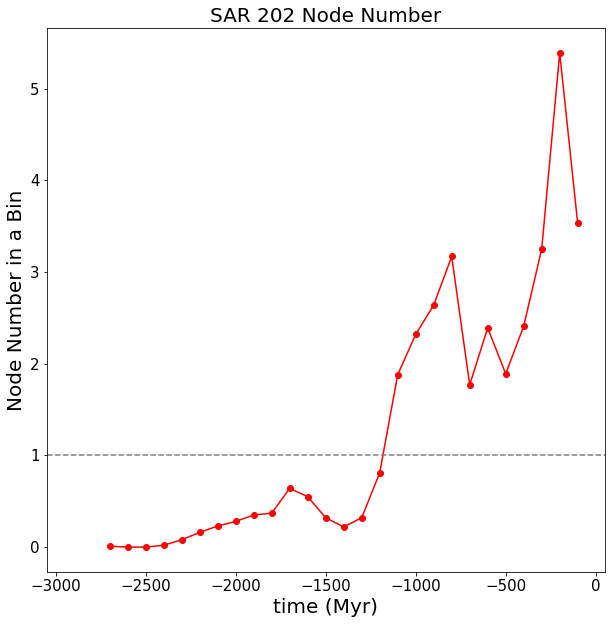

In [58]:
plt.subplots(1, 1, figsize=(10, 10))
plt.plot(SAR202_middle_age_interval_list, a, 'o', color='red')
plt.plot(SAR202_middle_age_interval_list, a, '-', color='red')
plt.xlim(-3050, 50)
plt.xlabel('time (Myr)',  size = '20')
plt.ylabel('Node Number in a Bin', size = '20')
plt.tick_params(axis='both', which='major', labelsize=15)
plt.title('SAR 202 Node Number',  size = '20')
plt.axhline(y=1., color='grey', linestyle='--', alpha = 1)
plt.savefig('SAR 202 Node Number.jpg')
plt.show()

# Divergence Rates WITHOUT All HGT Nodes and WITHOUT SAR202 Clade Nodes

In [59]:
nodes_NonHGT_and_NonSAR202_column_index =  Internal_node_SAR202_clade_list + HGT_nodes_index_on_AgeTree

In [60]:
# Remove the duplicates in the list "nodes_NonHGT_and_NonSAR202_column_index"
NoDuplicates_nodes_NonHGT_and_NonSAR202_column_index = list(set(nodes_NonHGT_and_NonSAR202_column_index))

In [61]:
nodes_NonHGT_and_NonSAR202 = df.drop(df.columns[NoDuplicates_nodes_NonHGT_and_NonSAR202_column_index], axis=1) 

In [62]:
# Take the first 3829 trees from the solution space of tress; 
# The index in "[]" can be changed for different "burn-in" we want.
df_list_1  = nodes_NonHGT_and_NonSAR202[3740:3840]
df_list_1 = df_list_1.values.tolist()
merged_df_list_1 = sum(df_list_1, [])
cleaned_df_list_1 = [float(x) for x in merged_df_list_1]

# Change the ages in the list to negative numbers# Divide the number of nodes in each bin (corresponding to the )
negative_age_list_1 = sorted([-x for x in cleaned_df_list_1 ])

In [63]:
min_nodes_NonHGT_and_NonSAR202_age = np.min(negative_age_list_1)
min_nodes_NonHGT_and_NonSAR202_age  ### Divergence of Node Numbers in Each Bin (NOT Cumulative Number of Nodes)

-3649.98

# Divergence Rates of all HGT Nodes with 80% confidence and at least one non-leaf recipient

### Extract HGT Nodes from the Tree

In [64]:
with open("September_10_2019_Modified_Eight_Calibrations_Gene_PhyloBayes_Posterior_sample.datedist") as f:
    content = f.readlines()
content = [x.strip() for x in content] 

tree = ete3.Tree(content[0],format=1)
tree

Tree node '3123.34' (0x1e5cb9dae2)

In [65]:
with open("Labelled-Gene_Tree.treefile") as f:
    content = f.readlines()

In [66]:
reconciliation_gene_tree = ete3.Tree(content[0],format=8)

In [67]:
print (reconciliation_gene_tree)


                  /-Streptomycesfulvoviolaceus_WP043457100
                 |
                 |   /-Acidimicrobiaceaebacterium_HAM02975
                 |  |
               /-|  |               /-Mycobacteriumtriplex_WP036469389
              |  |  |            /-|
              |  |  |         /-|   \-Mycobacteriumgenavense_WP025737195
              |  |  |        |  |
              |   \-|      /-|   \-Mycobacteriumconspicuum_WP085231027
              |     |     |  |
              |     |     |  |   /-Mycobacteriumarosiense_WP083064574
              |     |     |   \-|
              |     |   /-|     |   /-Mycobacteriummarseillense_WP067169648
              |     |  |  |      \-|
              |     |  |  |         \-Mycobacteriummarseillense_WP083017212
              |      \-|  |
              |        |   \-Mycobacteriumpalustre_WP085078461
              |        |
              |         \-Mycobacteriumsp12747610_WP066975764
              |
              |               /-Fran

In [68]:
root = [reconciliation_gene_tree.get_tree_root()]

all_node_TreeInformation = reconciliation_gene_tree.get_descendants()
all_node_TreeInformation = root + all_node_TreeInformation

In [69]:
all_node_TreeInformation

[Tree node 'm1' (0x1e5c76bd10),
 Tree node 'm2' (0x1e5c76bdb2),
 Tree node 'm301' (0x1e5ca423f7),
 Tree node 'm3' (0x1e5c76bdbe),
 Tree node 'm230' (0x1e5cc5cddc),
 Tree node 'm302' (0x1e5ca423d6),
 Tree node 'm521' (0x1e5c32e052),
 Tree node 'm4' (0x1e5c76bda9),
 Tree node 'm227' (0x1e5cc5cdd9),
 Tree node 'm231' (0x1e5cc5cde5),
 Tree node 'm286' (0x1e5c0a481c),
 Tree node 'm303' (0x1e5ca423fd),
 Tree node 'm396' (0x1e5d20266d),
 Tree node 'm522' (0x1e5c32e06d),
 Tree node 'm561' (0x1e5c32e0df),
 Tree node 'm5' (0x1e5c76bdb5),
 Tree node 'm100' (0x1e5c0c633a),
 Tree node 'SphingomonasspJJA5_WP072597474' (0x1e5cc5cdd3),
 Tree node 'SphingomonasspJJA5_WP072597460' (0x1e5cc5cde2),
 Tree node 'm232' (0x1e5cc5cdf4),
 Tree node 'm279' (0x1e5c0a487f),
 Tree node 'm287' (0x1e5ca423f4),
 Tree node 'm292' (0x1e5ca423c7),
 Tree node 'm304' (0x1e5ca423e5),
 Tree node 'Thermoflexushugenholtzii_WP098503884' (0x1e5d202661),
 Tree node 'm397' (0x1e5d2026cd),
 Tree node 'Acidimicrobiaceaebacterium_HAN

In [70]:
root = [reconciliation_gene_tree.get_tree_root()]
f = open('all_node_TreeInformation', 'r')
lines = f.read()
all_nodes_age_list = re.findall(r"'(.*?)'", lines)
all_nodes_age_list = [i for i in all_nodes_age_list]
all_nodes_age_list.insert(0,'m1')

In [71]:
all_nodes_age_list.remove(all_nodes_age_list[0])

In [72]:
reconciliation_gene_tree.get_leaves()

[Tree node 'Streptomycesfulvoviolaceus_WP043457100' (0x1e5c76bd58),
 Tree node 'Acidimicrobiaceaebacterium_HAM02975' (0x1e5c76bd5e),
 Tree node 'Mycobacteriumtriplex_WP036469389' (0x1e5c76bd91),
 Tree node 'Mycobacteriumgenavense_WP025737195' (0x1e5c76bd5b),
 Tree node 'Mycobacteriumconspicuum_WP085231027' (0x1e5c76bd61),
 Tree node 'Mycobacteriumarosiense_WP083064574' (0x1e5c76bdf1),
 Tree node 'Mycobacteriummarseillense_WP067169648' (0x1e5c5f4325),
 Tree node 'Mycobacteriummarseillense_WP083017212' (0x1e5c5f4322),
 Tree node 'Mycobacteriumpalustre_WP085078461' (0x1e5c5f4316),
 Tree node 'Mycobacteriumsp12747610_WP066975764' (0x1e5c5f430d),
 Tree node 'FrankiaspEUN1f_WP006543802' (0x1e5c5f4310),
 Tree node 'Frankiaasymbiotica_ONH24204' (0x1e5c5f432e),
 Tree node 'Frankiaasymbiotica_WP081438887' (0x1e5c5f433d),
 Tree node 'Cryptosporangiumaurantiacum_WP084742125' (0x1e5c5f4313),
 Tree node 'Streptomycesscabrisporus_WP078974072' (0x1e5c0c633d),
 Tree node 'Streptomycesscabrisporus_WP040

In [73]:
g = open('leaves_children_string', 'r')
lines = g.read()
leaves_nodes_age_list = re.findall(r"'(.*?)'", lines)
leaves_nodes_age_list = [i for i in leaves_nodes_age_list]

In [74]:
all_internal_nodes_list = [x for x in all_nodes_age_list if x not in leaves_nodes_age_list]

In [75]:
# all HGT Nodes with 80% confidence and at least one non-leaf recipient
HighConfidence_HGT_internal_nodes_list = ['m108', 'm171', 'm301', 'm309', 'm316', 'm401', 'm413', 'm417', 
                                          'm49', 'm522', 'm550', 'm561', 'm564', 'm584', 'm625', 'm626', 
                                          'm81', 'm85', 'm10', 'm101', 'm104', 'm117', 'm118', 'm12', 
                                          'm124', 'm13', 'm140', 'm144', 'm149','m150', 'm157', 'm164', 
                                          'm166', 'm209', 'm210', 'm232', 'm240', 'm247', 'm25', 'm254', 
                                          'm26', 'm27', 'm272', 'm3', 'm304', 'm333', 'm336', 'm337', 
                                          'm338', 'm339', 'm345', 'm346', 'm370', 'm371', 'm397', 'm398',
                                          'm41', 'm42', 'm44', 'm450', 'm452', 'm563', 'm579', 'm619', 
                                          'm637', 'm645', 'm646', 'm71', 'm8', 'm650', 'm651', 'm72', 
                                          'm73', 'm74']

In [76]:
HighConfidence_HGT_nodes_index = [all_nodes_age_list.index(i) for i in HighConfidence_HGT_internal_nodes_list]
np.array(HighConfidence_HGT_nodes_index)

array([358, 566,   2, 243, 374, 191, 128, 385, 484,  13,  87,  14,  89,
        52, 154, 213, 285, 489,  98,  33, 163, 288, 359, 215, 428, 277,
       361, 432, 362, 433, 506, 435, 565,  60, 105,  19, 174,  64,  32,
       177,  57,  99,  36,   3,  23,  76, 247, 303, 375, 453, 523, 571,
       188, 251,  25,  45, 222, 281, 350, 258, 389,  51,  90, 335, 411,
       342, 413, 102,  56, 542, 585, 161, 223, 283])

In [77]:
# Note that if we let HGT_index = a leave index, then what returned 
# by "tree.get_common_ancestor(HGT_internal_node.get_leaf_names())" will be the root of the tree
HighConfidence_HGT_node_on_AgeTree_list = []
for HGT_index in HighConfidence_HGT_nodes_index: # iterate the index of HGT node on the reconciliation gene tree
    HGT_internal_node = all_node_TreeInformation[HGT_index] # get ihe information of the HGT node on the reconciliation gene tree
    HGT_internal_node_ancestor = HGT_internal_node.get_leaf_names() # get the leave descendants of this HGT node
    HGT_node_on_AgeTree = tree.get_common_ancestor(HGT_internal_node_ancestor) # use leave descendants of this HGT node to get the HGT node information on the "age tree"
    HighConfidence_HGT_node_on_AgeTree_list.append(HGT_node_on_AgeTree)

In [78]:
a = open('80Confidence_HGT_node_on_AgeTree_list_Version2', 'r')
lines = a.read()
HGT_age_list_row_one = re.findall(r"'(\d+\.\d+|\d+)'", lines)
#HGT_age_list_row_one = [float(i) for i in HGT_age_list_row_one]

In [79]:
AgeTree_first_row = df.iloc[0,:].tolist()

In [80]:
HighConfidence_HGT_nodes_index_on_AgeTree = [AgeTree_first_row.index(i) for i in HGT_age_list_row_one]

In [81]:
# Take the first 3829 trees from the solution space of tress; 
# The index in "[]" can be changed for different "burn-in" we want.
df_list_1  = df[HighConfidence_HGT_nodes_index_on_AgeTree][3740:3840]
df_list_1 = df_list_1.values.tolist()
merged_df_list_1 = sum(df_list_1, [])
cleaned_df_list_1 = [float(x) for x in merged_df_list_1]

# Change the ages in the list to negative numbers# Divide the number of nodes in each bin (corresponding to the )
negative_age_list_1 = sorted([-x for x in cleaned_df_list_1 ])

In [82]:
min_gae_HGT_age = np.min(negative_age_list_1)
min_gae_HGT_age  

-3648.35

# Divergence Rates WITHOUT High Confidence HGT Nodes and WITHOUT SAR202 Clade Nodes

In [83]:
nodes_HighConfidence_HGT_and_SAR202_column_index =  Internal_node_SAR202_clade_list + HighConfidence_HGT_nodes_index_on_AgeTree

In [84]:
# Remove the duplicates in the list "nodes_HGT_and_SAR202_column_index"
NoDuplicates_nodes_HighConfidenceHGT_and_SAR202_column_index = list(set(nodes_HighConfidence_HGT_and_SAR202_column_index))

In [85]:
nodes_NonHighConfidenceHGT_and_NonSAR202 = df.drop(df.columns[NoDuplicates_nodes_HighConfidenceHGT_and_SAR202_column_index], axis=1) 

In [86]:
All_Nodes_Index_List = [i for i in range(0, 329)]
NonHighConfidenceHGT_and_NonSAR202_column_index = [x for x in All_Nodes_Index_List if x not in NoDuplicates_nodes_HighConfidenceHGT_and_SAR202_column_index]

In [87]:
# Take the first 3829 trees from the solution space of tress; 
# The index in "[]" can be changed for different "burn-in" we want.
df_list_1  = nodes_NonHighConfidenceHGT_and_NonSAR202[3740:3840]
df_list_1 = df_list_1.values.tolist()
merged_df_list_1 = sum(df_list_1, [])
cleaned_df_list_1 = [float(x) for x in merged_df_list_1]

# Change the ages in the list to negative numbers# Divide the number of nodes in each bin (corresponding to the )
negative_age_list_1 = sorted([-x for x in cleaned_df_list_1 ])

In [88]:
min_nodes_NonHGT_and_NonSAR202_age = np.min(negative_age_list_1)
min_nodes_NonHGT_and_NonSAR202_age  ### Divergence of Node Numbers in Each Bin (NOT Cumulative Number of Nodes)

-3649.98

## Growth Rates of All Nodes on the Age Tree

In [89]:
tree_solution_index = np.linspace(0, 3839, 3840).tolist()
tree_solution_index_list = [int(i) for i in tree_solution_index]

In [90]:
null_hypothesis_SAR202_growth_rate = np.log(len(Internal_node_SAR202_clade_list)) / 2600.

null_hypothesis_HighConfidence_HGT_growth_rate = np.log(len(HighConfidence_HGT_nodes_index_on_AgeTree)) / 2900.

null_hypothesis_NonHighConfidenceHGT_and_NonSAR202_growth_rate = np.log(len(NonHighConfidenceHGT_and_NonSAR202_column_index)) / 2900.
                                                                        
null_hypothesis_AllNodes_growth_rate = np.log(329) / 2900.                                                                        

In [91]:
SAR2020_all_log_density_list = []
SAR2020_all_average_node_density_list = []
HGT_all_log_density_list = []
HGT_all_average_node_density_list = []
nonBoth_all_log_density_list = []
nonBoth_all_average_node_density_list = []
AllNodes_all_log_density_list = []
AllNodes_all_average_node_density_list = []

for l in range(0, 1):
    #index_bootstrapping_values_one_round = np.random.choice(tree_solution_index_list, size=len(tree_solution_index_list), replace=True)
    index_bootstrapping_values_one_round = tree_solution_index_list
    df_bootstrap = df.loc[index_bootstrapping_values_one_round][0:4840]
    
    df_list_1  = df_bootstrap.loc[:,Internal_node_SAR202_clade_list]
    df_list_1  = df_list_1.values.tolist()
    merged_df_list_1 = sum(df_list_1, [])
    cleaned_df_list_1 = [float(x) for x in merged_df_list_1]
    negative_age_list_1 = sorted([-x for x in cleaned_df_list_1 ])
    his_data_eight_calibration_1 = np.histogram(negative_age_list_1, bins= int(2700/bin_size), range = (-2700, 0))
    age_interval_list = his_data_eight_calibration_1[1]
    age_interval_list = age_interval_list.tolist()
    middle_age_interval_list = [left_age + (bin_size/float(2)) for left_age in age_interval_list]
    del middle_age_interval_list[-1]
    node_number_each_interval = his_data_eight_calibration_1[0]
    node_number_each_interval = node_number_each_interval.tolist()
    node_number_each_interval_normalized_by_tree_number = [i / float(len(df_list_1)) for i in node_number_each_interval]
    node_density_each_interval_normalized_by_tree_number = [i / float(bin_size) for i in node_number_each_interval_normalized_by_tree_number]
    SAR2020_all_average_node_density_list.append(node_density_each_interval_normalized_by_tree_number)
    log_node_density_each_interval_normalized_by_tree_number = [np.log(i) for i in node_density_each_interval_normalized_by_tree_number]
    SAR2020_all_log_density_list.append(log_node_density_each_interval_normalized_by_tree_number)
    
    df_list_2  = df_bootstrap.loc[:,HighConfidence_HGT_nodes_index_on_AgeTree] 
    df_list_2 = df_list_2.values.tolist()
    merged_df_list_2 = sum(df_list_2, [])
    cleaned_df_list_2 = [float(x) for x in merged_df_list_2]
    negative_age_list_2 = sorted([-x for x in cleaned_df_list_2])
    his_data_eight_calibration_2 = np.histogram(negative_age_list_2, bins=int(3000/bin_size), range = (-3000, 0))
    age_interval_list = his_data_eight_calibration_2[1]
    age_interval_list = age_interval_list.tolist()
    middle_age_interval_list = [left_age + (bin_size/float(2)) for left_age in age_interval_list]
    del middle_age_interval_list[-1]
    node_number_each_interval = his_data_eight_calibration_2[0]
    node_number_each_interval = node_number_each_interval.tolist()
    node_number_each_interval_normalized_by_tree_number = [i / float(len(df_list_2)) for i in node_number_each_interval]
    node_density_each_interval_normalized_by_tree_number = [i / float(bin_size) for i in node_number_each_interval_normalized_by_tree_number]
    HGT_all_average_node_density_list.append(node_density_each_interval_normalized_by_tree_number)
    log_node_density_each_interval_normalized_by_tree_number = [np.log(i) for i in node_density_each_interval_normalized_by_tree_number]
    HGT_all_log_density_list.append(log_node_density_each_interval_normalized_by_tree_number)
    
    df_list_3  = df_bootstrap.loc[:,NonHighConfidenceHGT_and_NonSAR202_column_index]
    df_list_3 = df_list_3.values.tolist()
    merged_df_list_3 = sum(df_list_3, [])
    cleaned_df_list_3 = [float(x) for x in merged_df_list_3]
    negative_age_list_3 = sorted([-x for x in cleaned_df_list_3])
    his_data_eight_calibration_3 = np.histogram(negative_age_list_3, bins=int(3000/bin_size), range = (-3000, 0))
    age_interval_list = his_data_eight_calibration_3[1]
    age_interval_list = age_interval_list.tolist()
    middle_age_interval_list = [left_age + (bin_size/float(2)) for left_age in age_interval_list]
    del middle_age_interval_list[-1]
    node_number_each_interval = his_data_eight_calibration_3[0]
    node_number_each_interval = node_number_each_interval.tolist()
    node_number_each_interval_normalized_by_tree_number = [i / float(len(df_list_3)) for i in node_number_each_interval]
    node_density_each_interval_normalized_by_tree_number = [i / float(bin_size) for i in node_number_each_interval_normalized_by_tree_number]
    nonBoth_all_average_node_density_list.append(node_density_each_interval_normalized_by_tree_number)
    log_node_density_each_interval_normalized_by_tree_number = [np.log(i) for i in node_density_each_interval_normalized_by_tree_number]
    nonBoth_all_log_density_list.append(log_node_density_each_interval_normalized_by_tree_number)
    
    df_list_4 = df_bootstrap
    df_list_4 = df_list_4.values.tolist()
    merged_df_list_4 = sum(df_list_4, [])
    cleaned_df_list_4 = [float(x) for x in merged_df_list_4]
    negative_age_list_4 = sorted([-x for x in cleaned_df_list_4])
    his_data_eight_calibration_4 = np.histogram(negative_age_list_4, bins=int(3000/bin_size), range = (-3000, 0))
    age_interval_list = his_data_eight_calibration_4[1]
    age_interval_list = age_interval_list.tolist()
    middle_age_interval_list = [left_age + (bin_size/float(2)) for left_age in age_interval_list]
    del middle_age_interval_list[-1]
    node_number_each_interval = his_data_eight_calibration_4[0]
    node_number_each_interval = node_number_each_interval.tolist()
    node_number_each_interval_normalized_by_tree_number = [i / float(len(df_list_4)) for i in node_number_each_interval]
    node_density_each_interval_normalized_by_tree_number = [i / float(bin_size) for i in node_number_each_interval_normalized_by_tree_number]
    AllNodes_all_average_node_density_list.append(node_density_each_interval_normalized_by_tree_number)
    log_node_density_each_interval_normalized_by_tree_number = [np.log(i) for i in node_density_each_interval_normalized_by_tree_number]
    AllNodes_all_log_density_list.append(log_node_density_each_interval_normalized_by_tree_number)
    
    print (l)

0


In [92]:
# This is waht I used to compute the standard deviation for 100 samples 
fourthound__samples_SAR2020_all_log_density_list = [[-10.293448474108327,
  -9.722903615640714,
  -8.42758103272655,
  -7.795802798542897,
  -7.01195905651214,
  -6.458140386261043,
  -6.122617817327537,
  -5.837313867280724,
  -5.607762319671184,
  -5.385328743537666,
  -5.201587740089486,
  -5.251513300350235,
  -5.796206199283308,
  -6.283321990970244,
  -5.702221194089248,
  -4.749172878479909,
  -4.078840375686135,
  -3.7249385039296388,
  -3.6672402790104552,
  -3.416707671732372,
  -3.9171140679222973,
  -3.7228887702166844,
  -4.001167337367917,
  -3.8206267249449573,
  -3.408174792275195,
  -2.882822202639482,
  -3.410301195911626]]

In [93]:
fourthound__samples_SAR2020_all_log_density_list

[[-10.293448474108327,
  -9.722903615640714,
  -8.42758103272655,
  -7.795802798542897,
  -7.01195905651214,
  -6.458140386261043,
  -6.122617817327537,
  -5.837313867280724,
  -5.607762319671184,
  -5.385328743537666,
  -5.201587740089486,
  -5.251513300350235,
  -5.796206199283308,
  -6.283321990970244,
  -5.702221194089248,
  -4.749172878479909,
  -4.078840375686135,
  -3.7249385039296388,
  -3.6672402790104552,
  -3.416707671732372,
  -3.9171140679222973,
  -3.7228887702166844,
  -4.001167337367917,
  -3.8206267249449573,
  -3.408174792275195,
  -2.882822202639482,
  -3.410301195911626]]

In [94]:
fivehundred_samples_SAR2020_all_log_density_list = [[-10.419778284410283,
  -9.533483923290392,
  -8.622553707074063,
  -7.77525584668686,
  -6.907755278982137,
  -6.4630694577206915,
  -6.032286541628237,
  -5.892524599253078,
  -5.615771597333488,
  -5.451920125346955,
  -5.2030071867437115,
  -5.177871213472169,
  -5.822566010646168,
  -6.140654791298754,
  -5.713832810509703,
  -4.684213393328545,
  -4.0444121934738915,
  -3.7575866521237273,
  -3.6912823387302467,
  -3.4179367056664534,
  -3.940422479949844,
  -3.681705250365936,
  -4.0085339058089895,
  -3.8369155329413407,
  -3.4438961361952707,
  -2.8795505192645816,
  -3.3808066920144215]]
fivehundred_samples_SAR2020_all_log_density_list

[[-10.419778284410283,
  -9.533483923290392,
  -8.622553707074063,
  -7.77525584668686,
  -6.907755278982137,
  -6.4630694577206915,
  -6.032286541628237,
  -5.892524599253078,
  -5.615771597333488,
  -5.451920125346955,
  -5.2030071867437115,
  -5.177871213472169,
  -5.822566010646168,
  -6.140654791298754,
  -5.713832810509703,
  -4.684213393328545,
  -4.0444121934738915,
  -3.7575866521237273,
  -3.6912823387302467,
  -3.4179367056664534,
  -3.940422479949844,
  -3.681705250365936,
  -4.0085339058089895,
  -3.8369155329413407,
  -3.4438961361952707,
  -2.8795505192645816,
  -3.3808066920144215]]

<Figure size 720x720 with 0 Axes>

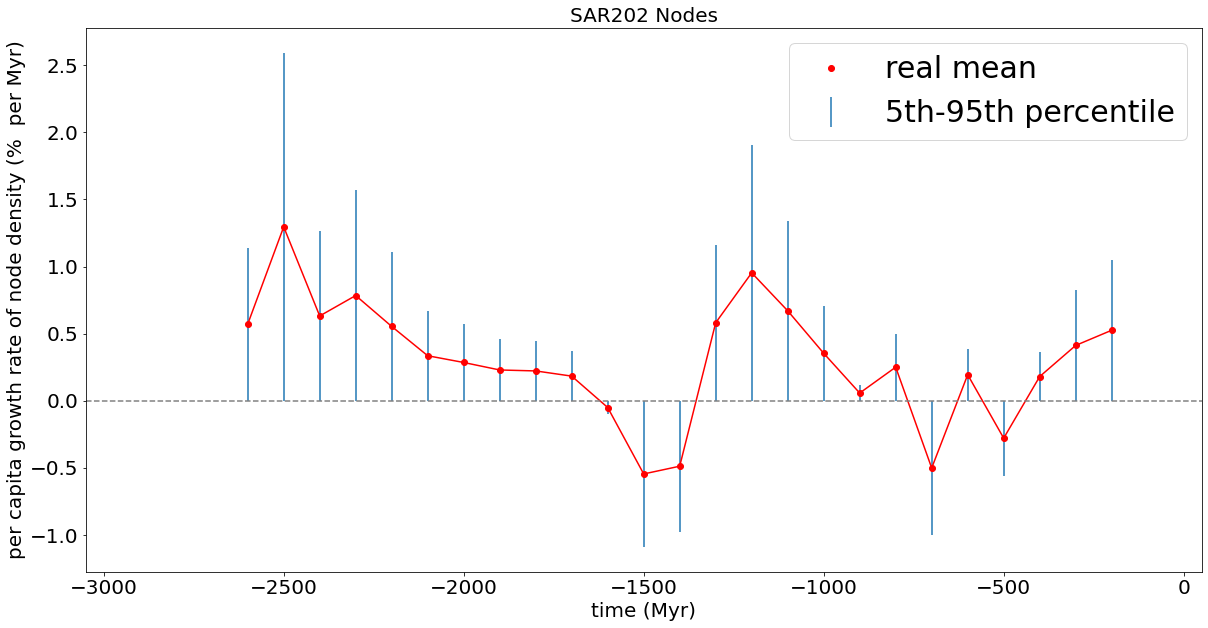

In [95]:
plt.figure(figsize=(10,10))

SAR202all_AllLogDensity_DataFrame = pd.DataFrame(np.array(SAR2020_all_log_density_list))
SAR202_nonNANandINF_index = np.isinf(SAR202all_AllLogDensity_DataFrame).any(1).tolist()

SAR202_nonNANandINF_index = np.isinf(SAR202all_AllLogDensity_DataFrame).any(1).tolist()
SAR202_nonNANandINF_index_list = []
for i in range (0, len(SAR202_nonNANandINF_index)):
    if SAR202_nonNANandINF_index[i] == False:
        SAR202_nonNANandINF_index_list.append(i)
        
SAR202NodeDensity_nonNANandINF_DataFrame = SAR202all_AllLogDensity_DataFrame.loc[SAR202_nonNANandINF_index_list]

SAR202_middle_age_interval_list = np.linspace(-2600, -100, 26)

SAR202Rate_list = []
SAR202Rate_Mean_list = []
SAR202Rate_STD_list = []
SAR202Rate_Median_list = []
SAR202Rate_Confidence_UpperBound_list = []
SAR202Rate_Confidence_LowerBound_list = []
for i in range(0,26):
    SAR202Rate = (SAR202NodeDensity_nonNANandINF_DataFrame[i+1] - SAR202NodeDensity_nonNANandINF_DataFrame[i]) / bin_size *100
    SAR202Rate_list.append(SAR202Rate)
    SAR202Rate_Mean_list.append(SAR202Rate.mean())
    SAR202Rate_STD_list.append(SAR202Rate.std())
    SAR202Rate_Median_list.append(SAR202Rate.median())
    SAR202Rate_Confidence_UpperBound_list.append(SAR202Rate.quantile(0.9))
    SAR202Rate_Confidence_LowerBound_list.append(SAR202Rate.quantile(0.1))
    
plt.subplots(1, 1, figsize=(20, 10))
plt.plot(SAR202_middle_age_interval_list[0:25], SAR202Rate_Mean_list[0:25], '-', color='red')
plt.plot(SAR202_middle_age_interval_list[0:25], SAR202Rate_Mean_list[0:25],  'o', color='red', label="real mean")
plt.errorbar(SAR202_middle_age_interval_list[0:25], SAR202Rate_Mean_list[0:25], yerr=[SAR202Rate_Confidence_LowerBound_list[0:25],SAR202Rate_Confidence_UpperBound_list[0:25]], linestyle='',label="5th-95th percentile")

plt.legend(fontsize = '30')
plt.xlim(-3050, 50)
plt.xlabel('time (Myr)',  size = '20')
plt.ylabel('per capita growth rate of node density (%  per Myr)', size = '20')
plt.tick_params(axis='both', which='major', labelsize=20)
plt.title('SAR202 Nodes',  size = '20')
plt.axhline(y=0., color='grey', linestyle='--', alpha = 1)
plt.savefig('Boostrap SAR202 divergence rate growth.jpg')
plt.show()

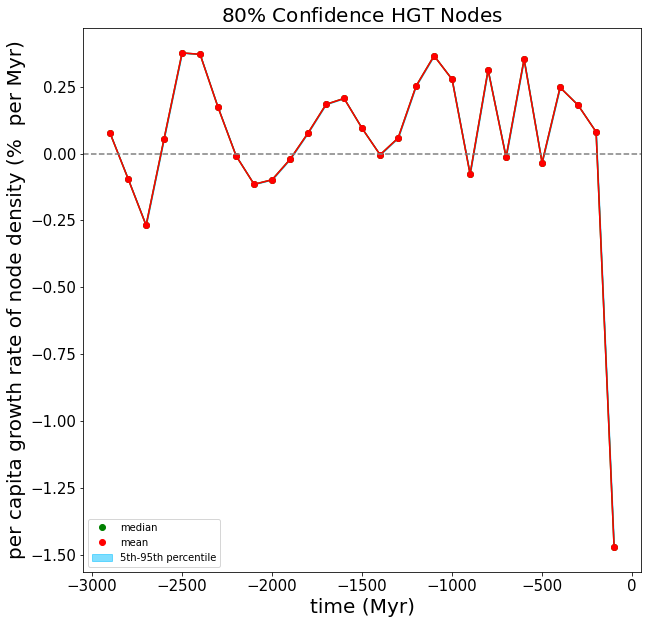

In [96]:
HighConfidenceNodeDensity_DataFrame = pd.DataFrame(np.array(HGT_all_log_density_list))
HighConfidenceNodeDensity_nonNANandINF_index = np.isinf(HighConfidenceNodeDensity_DataFrame).any(1).tolist()

HighConfidenceNodeDensity_nonNANandINF_index_list = []
for i in range (0, len(HighConfidenceNodeDensity_nonNANandINF_index)):
    if HighConfidenceNodeDensity_nonNANandINF_index[i] == False:
        HighConfidenceNodeDensity_nonNANandINF_index_list.append(i)
        
HighConfidenceNodeDensity_nonNANandINF_DataFrame = HighConfidenceNodeDensity_DataFrame.loc[HighConfidenceNodeDensity_nonNANandINF_index_list]

HighConfidenceRate_list = []
HighConfidenceRate_Mean_list = []
HighConfidenceRate_STD_list = []
HighConfidenceRate_Median_list = []
HighConfidenceRate_Confidence_UpperBound_list = []
HighConfidenceRate_Confidence_LowerBound_list = []
for i in range(0,29):
    HighConfidenceRate = (HighConfidenceNodeDensity_nonNANandINF_DataFrame[i+1] - HighConfidenceNodeDensity_nonNANandINF_DataFrame[i]) / bin_size *100
    HighConfidenceRate_list.append(HighConfidenceRate)
    HighConfidenceRate_Mean_list.append(HighConfidenceRate.mean())
    HighConfidenceRate_STD_list.append(HighConfidenceRate.std())
    HighConfidenceRate_Median_list.append(HighConfidenceRate.median())
    HighConfidenceRate_Confidence_UpperBound_list.append(HighConfidenceRate.quantile(0.9))
    HighConfidenceRate_Confidence_LowerBound_list.append(HighConfidenceRate.quantile(0.1))
    
HighConfidence_middle_age_interval_list = np.linspace(-2900, -100, 29)
HighConfidence_middle_age_interval_list

plt.subplots(1, 1, figsize=(10, 10))
plt.plot(HighConfidence_middle_age_interval_list, HighConfidenceRate_Median_list, '-', color='green')
plt.plot(HighConfidence_middle_age_interval_list, HighConfidenceRate_Median_list,  'o', color='green', label="median")
plt.plot(HighConfidence_middle_age_interval_list, HighConfidenceRate_Mean_list, '-', color='red')
plt.plot(HighConfidence_middle_age_interval_list, HighConfidenceRate_Mean_list,  'o', color='red', label="mean")
plt.fill_between(HighConfidence_middle_age_interval_list, HighConfidenceRate_Confidence_LowerBound_list, HighConfidenceRate_Confidence_UpperBound_list, color='deepskyblue', alpha=0.5, label="5th-95th percentile")
plt.legend()
plt.xlim(-3050, 50)
plt.xlabel('time (Myr)',  size = '20')
plt.ylabel('per capita growth rate of node density (%  per Myr)', size = '20')
plt.tick_params(axis='both', which='major', labelsize=15)
plt.title('$80\%$ Confidence HGT Nodes',  size = '20')
plt.axhline(y=0., color='grey', linestyle='--', alpha = 1)
#plt.savefig('Boostrap HighConfidence divergence rate growth.jpg')
plt.show()

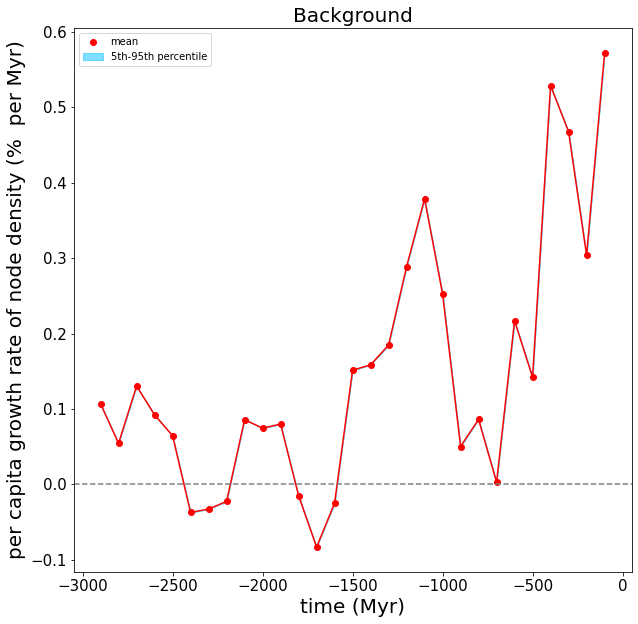

In [97]:
NonBoth_middle_age_interval_list = np.linspace(-2900, -100, 29)

NonBothNodeDensity_DataFrame = pd.DataFrame(np.array(nonBoth_all_log_density_list))

NonBothNodeDensity_nonNANandINF_index = np.isinf(NonBothNodeDensity_DataFrame).any(1).tolist()
NonBothNodeDensity_nonNANandINF_index_list = []
for i in range (0, len(NonBothNodeDensity_nonNANandINF_index)):
    if NonBothNodeDensity_nonNANandINF_index[i] == False:
        NonBothNodeDensity_nonNANandINF_index_list.append(i)
        
NonBothNodeDensity_nonNANandINF_DataFrame = NonBothNodeDensity_DataFrame.loc[NonBothNodeDensity_nonNANandINF_index_list]

NonBothRate_list = []
NonBothRate_Mean_list = []
NonBothRate_STD_list = []
NonBothRate_Median_list = []
NonBothRate_Confidence_UpperBound_list = []
NonBothRate_Confidence_LowerBound_list = []
for i in range(0,29):
    NonBothRate = (NonBothNodeDensity_nonNANandINF_DataFrame[i+1] - NonBothNodeDensity_nonNANandINF_DataFrame[i]) / bin_size *100
    NonBothRate_list.append(NonBothRate)
    NonBothRate_Mean_list.append(NonBothRate.mean())
    NonBothRate_STD_list.append(NonBothRate.std())
    NonBothRate_Median_list.append(NonBothRate.median())
    NonBothRate_Confidence_UpperBound_list.append(NonBothRate.quantile(0.9))
    NonBothRate_Confidence_LowerBound_list.append(NonBothRate.quantile(0.1))

plt.subplots(1, 1, figsize=(10, 10))
plt.plot(NonBoth_middle_age_interval_list, NonBothRate_Mean_list, '-', color='red')
plt.plot(NonBoth_middle_age_interval_list, NonBothRate_Mean_list, 'o', color='red', label="mean")
plt.fill_between(NonBoth_middle_age_interval_list, NonBothRate_Confidence_LowerBound_list, NonBothRate_Confidence_UpperBound_list, color='deepskyblue', alpha=0.5, label="5th-95th percentile")
plt.legend()
plt.xlim(-3050, 50)
plt.xlabel('time (Myr)',  size = '20')
plt.ylabel('per capita growth rate of node density (%  per Myr)', size = '20')
plt.tick_params(axis='both', which='major', labelsize=15)
plt.title('Background',  size = '20')
plt.axhline(y=0., color='grey', linestyle='--', alpha = 1)
#plt.savefig('Boostrap NonHighConfidence and NonSAR202 divergence rate growth.jpg')
plt.show()

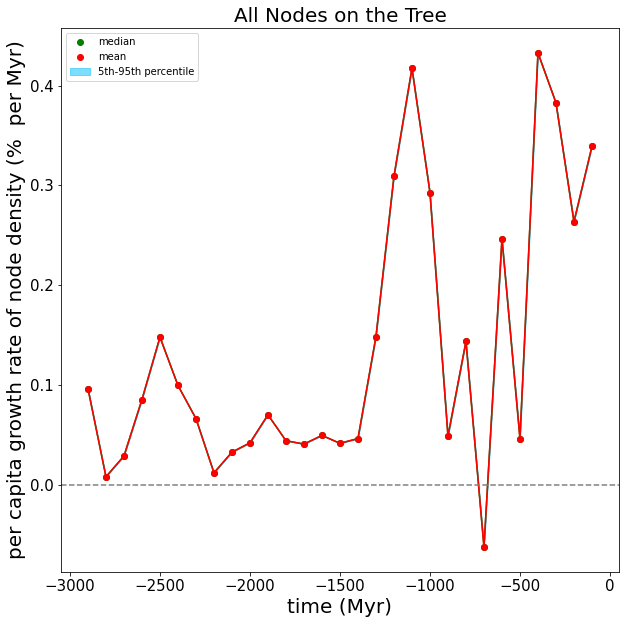

In [98]:
AllNodeDensity_DataFrame = pd.DataFrame(np.array(AllNodes_all_log_density_list))
AllNodeDensity_nonNANandINF_index = np.isinf(AllNodeDensity_DataFrame).any(1).tolist()

AllNodeDensity_nonNANandINF_index_list = []
for i in range (0, len(AllNodeDensity_nonNANandINF_index)):
    if AllNodeDensity_nonNANandINF_index[i] == False:
        AllNodeDensity_nonNANandINF_index_list.append(i)
        
AllNodeDensity_nonNANandINF_DataFrame = AllNodeDensity_DataFrame.loc[AllNodeDensity_nonNANandINF_index_list]

AllRate_list = []
AllRate_Mean_list = []
AllRate_STD_list = []
AllRate_Median_list = []
AllRate_Confidence_UpperBound_list = []
AllRate_Confidence_LowerBound_list = []
for i in range(0,29):
    AllRate = (AllNodeDensity_nonNANandINF_DataFrame[i+1] - AllNodeDensity_nonNANandINF_DataFrame[i]) / bin_size *100
    AllRate_list.append(AllRate)
    AllRate_Mean_list.append(AllRate.mean())
    AllRate_STD_list.append(AllRate.std())
    AllRate_Median_list.append(AllRate.median())
    AllRate_Confidence_UpperBound_list.append(AllRate.quantile(0.9))
    AllRate_Confidence_LowerBound_list.append(AllRate.quantile(0.1))
    
plt.subplots(1, 1, figsize=(10, 10))
plt.plot(HighConfidence_middle_age_interval_list, AllRate_Median_list, '-', color='green')
plt.plot(HighConfidence_middle_age_interval_list, AllRate_Median_list,  'o', color='green', label="median")
plt.plot(HighConfidence_middle_age_interval_list, AllRate_Mean_list, '-', color='red')
plt.plot(HighConfidence_middle_age_interval_list, AllRate_Mean_list,  'o', color='red', label="mean")
plt.fill_between(HighConfidence_middle_age_interval_list, AllRate_Confidence_LowerBound_list, AllRate_Confidence_UpperBound_list, color='deepskyblue', alpha=0.5, label="5th-95th percentile")
plt.legend()
plt.xlim(-3050, 50)
plt.xlabel('time (Myr)',  size = '20')
plt.ylabel('per capita growth rate of node density (%  per Myr)', size = '20')
plt.tick_params(axis='both', which='major', labelsize=15)
plt.title('All Nodes on the Tree',  size = '20')
plt.axhline(y=0., color='grey', linestyle='--', alpha = 1)
#plt.savefig('Boostrap All divergence rate growth.jpg')
plt.show()

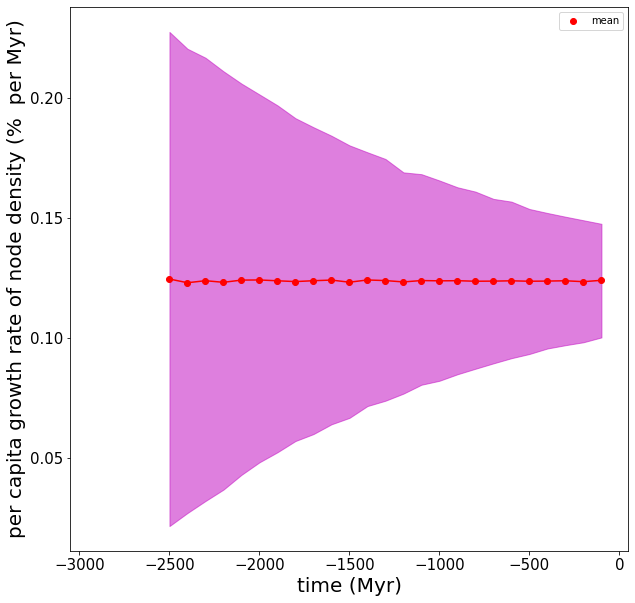

In [99]:
with open("10000Simulation_SAR202_100MyrBinSize_tree_nullhypothesis.txt") as f:
    datawewant = f.readlines()
input = datawewant[0]
output= ast.literal_eval(input)
SimulatedSAR202Rate_list = output

SimulatedSAR202Rate_DataFrame = np.log(pd.DataFrame(SimulatedSAR202Rate_list))

SimulatedSAR202RateList = []
SimulatedSAR202Rate_Mean_list = []
SimulatedSAR202Rate_STD_list = []
SimulatedSAR202Rate_Median_list = []
SimulatedSAR202Rate_Confidence_UpperBound_list = []
SimulatedSAR202Rate_Confidence_LowerBound_list = []

SimulatedSAR202_middle_age_interval_list = np.linspace(-2600, -100, 26)

for i in range(0,26):
    SimulatedSAR202Rate = (SimulatedSAR202Rate_DataFrame[i+1] - SimulatedSAR202Rate_DataFrame[i]) / bin_size *100
    SimulatedSAR202RateList.append(SimulatedSAR202Rate)
    SimulatedSAR202Rate_Mean_list.append(SimulatedSAR202Rate.mean())
    SimulatedSAR202Rate_STD_list.append(SimulatedSAR202Rate.std())
    SimulatedSAR202Rate_Median_list.append(SimulatedSAR202Rate.median())
    SimulatedSAR202Rate_Confidence_UpperBound_list.append(SimulatedSAR202Rate.quantile(0.975))
    SimulatedSAR202Rate_Confidence_LowerBound_list.append(SimulatedSAR202Rate.quantile(0.025))
    
SimulatedSAR202_lower = ((np.asarray(SimulatedSAR202Rate_Mean_list) - np.asarray(SimulatedSAR202Rate_Confidence_LowerBound_list))*np.sqrt(3800)).tolist()
SimulatedSAR202_upper = ((np.asarray(SimulatedSAR202Rate_Confidence_UpperBound_list) - np.asarray(SimulatedSAR202Rate_Mean_list))*np.sqrt(3800)).tolist()

b = np.array(SimulatedSAR202Rate_STD_list)
SimulatedSAR202_data_upper = SimulatedSAR202Rate_Mean_list + b
SimulatedSAR202_data_lower = SimulatedSAR202Rate_Mean_list - b

plt.subplots(1, 1, figsize=(10, 10))

#plt.errorbar(SimulatedSAR202_middle_age_interval_list[1:26], SimulatedSAR202Rate_Mean_list[1:26], yerr=[SimulatedSAR202_lower_bound[1:26], SimulatedSAR202Rate_Confidence_UpperBound_list[1:26]], linestyle='',label="5th-95th percentile")
plt.plot(SimulatedSAR202_middle_age_interval_list[1:26], SimulatedSAR202Rate_Mean_list[1:26], '-', color='red')
plt.plot(SimulatedSAR202_middle_age_interval_list[1:26], SimulatedSAR202Rate_Mean_list[1:26],  'o', color='red', label="mean")
plt.fill_between(SimulatedSAR202_middle_age_interval_list[1:26], np.asarray(SimulatedSAR202Rate_Confidence_LowerBound_list)[1:26], np.asarray(SimulatedSAR202Rate_Confidence_UpperBound_list)[1:26],color='m',alpha=.5)

plt.legend()
plt.xlim(-3050, 50)
plt.xlabel('time (Myr)',  size = '20')
plt.ylabel('per capita growth rate of node density (%  per Myr)', size = '20')
plt.tick_params(axis='both', which='major', labelsize=15)
#plt.title('SAR202 Nodes',  size = '20')
#plt.savefig('Boostrap SAR202 divergence rate growth.jpg')
plt.show()

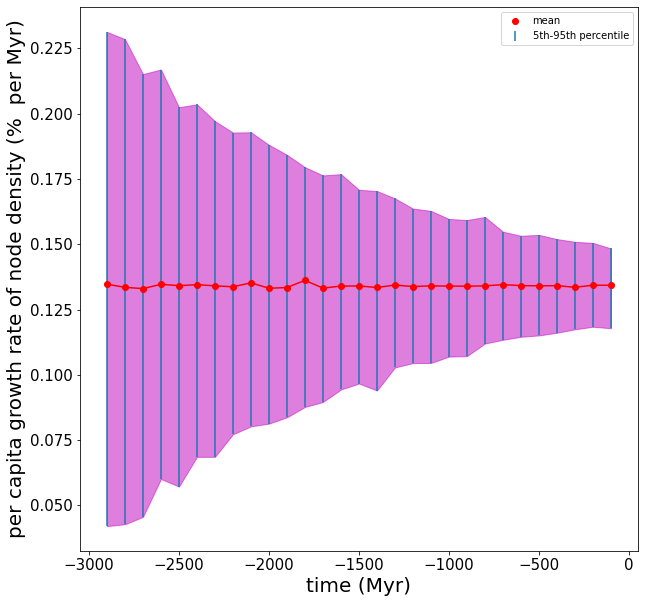

In [100]:
with open("HGT_100MyrBinSize_simulation_tree_nullhypothesis.txt") as f:
    datawewant = f.readlines()
input = datawewant[0]
output= ast.literal_eval(input)
SimulatedHGTRate_list = output

SimulatedHGTRate_DataFrame = np.log(pd.DataFrame(SimulatedHGTRate_list))

SimulatedHGTRateList = []
SimulatedHGTRate_Mean_list = []
SimulatedHGTRate_STD_list = []
SimulatedHGTRate_Median_list = []
SimulatedHGTRate_Confidence_UpperBound_list = []
SimulatedHGTRate_Confidence_LowerBound_list = []

SimulatedHGT_middle_age_interval_list = np.linspace(-3000, -100, 30)

for i in range(0,30):
    SimulatedHGTRate = (SimulatedHGTRate_DataFrame[i+1] - SimulatedHGTRate_DataFrame[i]) / bin_size *100
    SimulatedHGTRateList.append(SimulatedHGTRate)
    SimulatedHGTRate_Mean_list.append(SimulatedHGTRate.mean())
    SimulatedHGTRate_STD_list.append(SimulatedHGTRate.std())
    SimulatedHGTRate_Median_list.append(SimulatedHGTRate.median())
    SimulatedHGTRate_Confidence_UpperBound_list.append(SimulatedHGTRate.quantile(0.975))
    SimulatedHGTRate_Confidence_LowerBound_list.append(SimulatedHGTRate.quantile(0.025))
    
SimulatedHGT_lower_bound = (np.asarray(SimulatedHGTRate_Mean_list) - np.asarray(SimulatedHGTRate_Confidence_LowerBound_list)).tolist()
SimulatedHGT_upper_bound = (np.asarray(SimulatedHGTRate_Confidence_UpperBound_list) - np.asarray(SimulatedHGTRate_Mean_list)).tolist()

b = np.array(SimulatedHGTRate_STD_list)
SimulatedHGT_data_upper =  SimulatedHGTRate_Mean_list + b
SimulatedHGT_data_lower =  SimulatedHGTRate_Mean_list - b

plt.subplots(1, 1, figsize=(10, 10))

plt.errorbar(SimulatedHGT_middle_age_interval_list[1:30], SimulatedHGTRate_Mean_list[1:30], yerr=[SimulatedHGT_lower_bound[1:30], SimulatedHGT_upper_bound[1:30]], linestyle='',label="5th-95th percentile")
plt.plot(SimulatedHGT_middle_age_interval_list[1:30], SimulatedHGTRate_Mean_list[1:30], '-', color='red')
plt.plot(SimulatedHGT_middle_age_interval_list[1:30], SimulatedHGTRate_Mean_list[1:30],  'o', color='red', label="mean")
plt.fill_between(SimulatedHGT_middle_age_interval_list[1:30], np.asarray(SimulatedHGTRate_Confidence_LowerBound_list)[1:30], np.asarray(SimulatedHGTRate_Confidence_UpperBound_list)[1:30],color='m',alpha=.5)

plt.legend()
plt.xlim(-3050, 50)
plt.xlabel('time (Myr)',  size = '20')
plt.ylabel('per capita growth rate of node density (%  per Myr)', size = '20')
plt.tick_params(axis='both', which='major', labelsize=15)
#plt.title('SAR202 Nodes',  size = '20')
#plt.savefig('Boostrap SAR202 divergence rate growth.jpg')
plt.show()

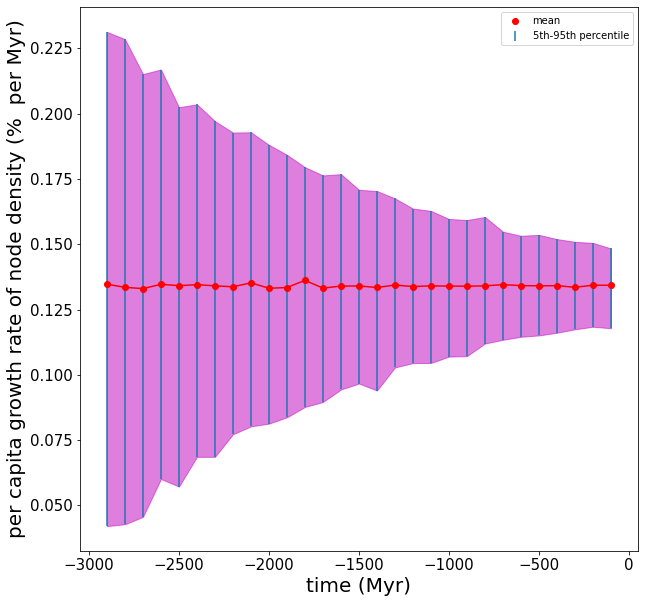

In [101]:
with open("10000Simulation_Background_100MyrBinSize_tree_nullhypothesis.txt") as f:
    datawewant = f.readlines()
input = datawewant[0]
output= ast.literal_eval(input)
Simulation_Control_list = output

SimulatedControlRate_DataFrame = np.log(pd.DataFrame(SimulatedHGTRate_list))

SimulatedControlRateList = []
SimulatedControlRate_Mean_list = []
SimulatedControlRate_STD_list = []
SimulatedControlRate_Median_list = []
SimulatedControlRate_Confidence_UpperBound_list = []
SimulatedControlRate_Confidence_LowerBound_list = []

SimulatedControl_middle_age_interval_list = np.linspace(-3000, -100, 30)

for i in range(0,30):
    SimulatedControlRate = (SimulatedControlRate_DataFrame[i+1] - SimulatedControlRate_DataFrame[i]) / bin_size *100
    SimulatedControlRateList.append(SimulatedControlRate)
    SimulatedControlRate_Mean_list.append(SimulatedControlRate.mean())
    SimulatedControlRate_STD_list.append(SimulatedControlRate.std())
    SimulatedControlRate_Median_list.append(SimulatedControlRate.median())
    SimulatedControlRate_Confidence_UpperBound_list.append(SimulatedControlRate.quantile(0.975))
    SimulatedControlRate_Confidence_LowerBound_list.append(SimulatedControlRate.quantile(0.025))
    
SimulatedControl_lower_bound = (np.asarray(SimulatedControlRate_Mean_list) - np.asarray(SimulatedControlRate_Confidence_LowerBound_list)).tolist()
SimulatedControl_upper_bound = (np.asarray(SimulatedControlRate_Confidence_UpperBound_list) - np.asarray(SimulatedControlRate_Mean_list)).tolist()

b = np.array(SimulatedControlRate_STD_list)
SimulatedControl_data_upper =  SimulatedControlRate_Mean_list + b
SimulatedControl_data_lower =  SimulatedControlRate_Mean_list - b

plt.subplots(1, 1, figsize=(10, 10))

plt.errorbar(SimulatedControl_middle_age_interval_list[1:30], SimulatedControlRate_Mean_list[1:30], yerr=[SimulatedControl_lower_bound[1:30], SimulatedControl_upper_bound[1:30]], linestyle='',label="5th-95th percentile")
plt.plot(SimulatedControl_middle_age_interval_list[1:30], SimulatedControlRate_Mean_list[1:30], '-', color='red')
plt.plot(SimulatedControl_middle_age_interval_list[1:30], SimulatedControlRate_Mean_list[1:30],  'o', color='red', label="mean")
plt.fill_between(SimulatedControl_middle_age_interval_list[1:30], np.asarray(SimulatedControlRate_Confidence_LowerBound_list)[1:30], np.asarray(SimulatedControlRate_Confidence_UpperBound_list)[1:30],color='m',alpha=.5)

plt.legend()
plt.xlim(-3050, 50)
plt.xlabel('time (Myr)',  size = '20')
plt.ylabel('per capita growth rate of node density (%  per Myr)', size = '20')
plt.tick_params(axis='both', which='major', labelsize=15)
#plt.title('SAR202 Nodes',  size = '20')
#plt.savefig('Boostrap SAR202 divergence rate growth.jpg')
plt.show()

<Figure size 1080x936 with 0 Axes>

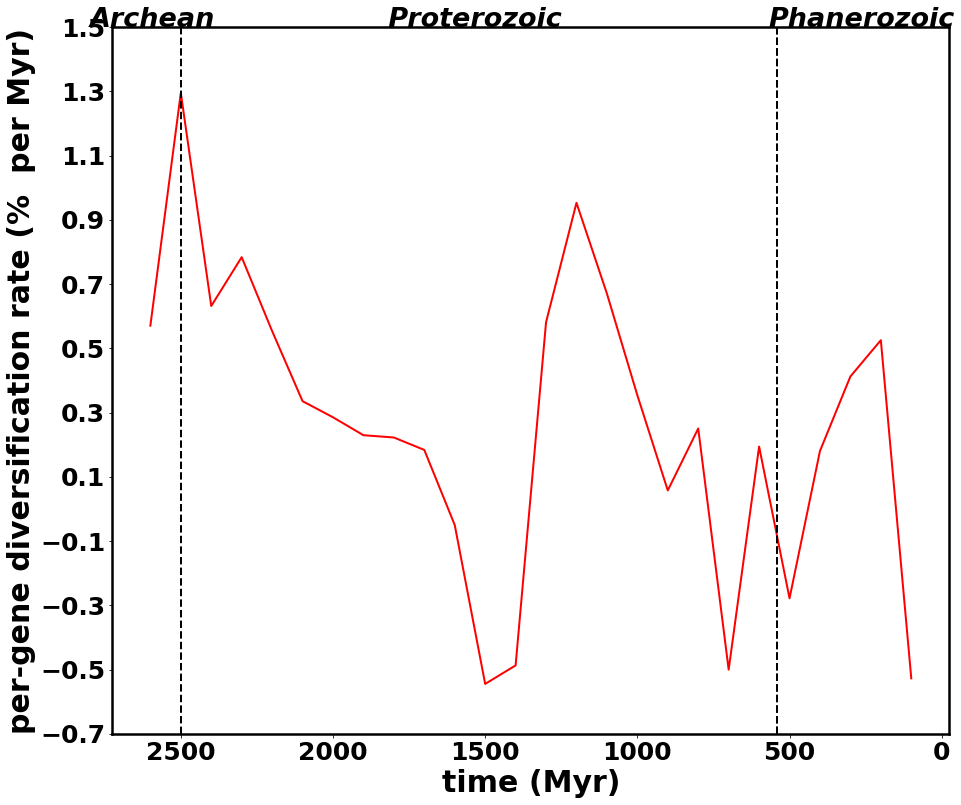

In [102]:
plt.figure(figsize=(15,13))
SAR202_middle_age_interval_list = np.linspace(2600, 100, 26)
fig, axes = plt.subplots(1, 1, sharex=True, sharey=True, figsize=(15,13))

plt.subplot(1,1,1)
ax = fig.gca()
plt.plot(SAR202_middle_age_interval_list[0:26], SAR202Rate_Mean_list[0:26], '-', color='red', linewidth=2)
#plt.plot(SAR202_middle_age_interval_list[0:26], SAR202Rate_Mean_list[0:26], 'o', color='red', label="real data", linewidth=3)
#SAR202_lower_bound = (np.asarray(SAR202Rate_Mean_list) - np.asarray(SAR202Rate_Confidence_LowerBound_list)).tolist()
#SAR202_upper_bound = (np.asarray(SAR202Rate_Confidence_UpperBound_list) - np.asarray(SAR202Rate_Mean_list)).tolist()
#plt.errorbar(SAR202_middle_age_interval_list[1:25], SAR202Rate_Mean_list[1:25], yerr=[SAR202_lower_bound[1:25], SAR202_upper_bound[1:25]], linestyle='',label="0.025 - 0.975 significance level for real data")
#plt.plot(SimulatedSAR202_middle_age_interval_list[1:26], SimulatedSAR202Rate_Mean_list[1:26], '-', color='blue')
#plt.plot(SimulatedSAR202_middle_age_interval_list[1:26], SimulatedSAR202Rate_Mean_list[1:26],  'o', color='blue', label="mean of of null hypothesis")
#plt.fill_between(SimulatedSAR202_middle_age_interval_list[1:25], np.asarray(SimulatedSAR202Rate_Confidence_LowerBound_list)[1:25], 
#                 np.asarray(SimulatedSAR202Rate_Confidence_UpperBound_list)[1:25], color='green', alpha=.3, label="0.025 - 0.975 significance level for simulated data")
#plt.plot(SimulatedSAR202_middle_age_interval_list[1:26], SimulatedSAR202_data_upper[1:26], '-', color='m')
#plt.plot(SimulatedSAR202_middle_age_interval_list[1:26], SimulatedSAR202_data_upper[1:26], 'o', color='m')
#plt.plot(SimulatedSAR202_middle_age_interval_list[1:26], SimulatedSAR202_data_lower[1:26], '-', color='m')
#plt.plot(SimulatedSAR202_middle_age_interval_list[1:26], SimulatedSAR202_data_lower[1:26], 'o', color='m', label="standard deviation of null hypothesis")

#plt.axvline(x=2400, linewidth=2, color='black', linestyle='--')
#plt.axvline(x=2300, linewidth=2, color='black', linestyle='--')
#plt.axvline(x=2060, linewidth=2, color='black', linestyle='--')
#plt.text(2380, 0.00335, 'GOE', color='black', alpha=1, fontstyle='italic', fontweight='bold', fontsize=22, rotation=90)
#plt.text(2200, 0.00215, 'Lomagundi Excursion', color='black', alpha=1, fontstyle='italic', fontweight='bold', fontsize=22, rotation=90)
plt.axvline(x=2500, linewidth=2, color='black', linestyle='--')
plt.text(2800, 1.5, 'Archean', color='black', alpha=1, fontstyle='italic', fontweight='bold', fontsize=27, rotation=0)

plt.axvline(x=541, linewidth=2, color='black', linestyle='--')
plt.text(1850, 1.5, ' Proterozoic', color='black', alpha=1, fontstyle='italic', fontweight='bold', fontsize=27, rotation=0)

plt.axvline(x=541, linewidth=2, color='black', linestyle='--')
plt.text(570, 1.5, 'Phanerozoic', color='black', alpha=1, fontstyle='italic', fontweight='bold', fontsize=27, rotation=0)

plt.gca().invert_xaxis()

plt.tick_params(axis='both', which='major', labelsize=25)
plt.xlabel('time (Myr)',  size = '30', weight='bold')
plt.ylabel('per-gene diversification rate (%  per Myr)',  size = '30', weight='bold')
plt.xticks(np.arange(0, 2700, step=500), weight='bold')
plt.yticks(np.arange(-0.7, 1.6, step=0.2), weight='bold')
plt.setp(ax.spines.values(), linewidth=2.5)
plt.savefig('SAR202 Divergence Rate.jpg')

In [103]:
Berner_oxygen_level = np.array([38, 36, 34, 34, 34, 34, 34, 34, 34, 34, 
                                32, 32, 32, 32, 30, 30, 30, 28, 26, 24,
                                38, 42, 45, 54, 62, 68, 76, 78, 80, 70, 
                                60, 50, 40, 30, 26, 30, 30, 30, 26, 36, 
                                38, 40, 42, 42, 42, 42, 44, 46, 48, 50, 
                                50, 48, 46, 44, 42, 41, 40, 38])


Berner_oxygen_time = np.linspace(570, 0, num=58)

# Perform linear extrapolation
from scipy import interpolate
f = interpolate.interp1d(Berner_oxygen_time, Berner_oxygen_level, fill_value = "extrapolate", bounds_error=False)
#f(580) = 40, f(590) = 42, f(600)=44

In [104]:
Berner_oxygen_level_extrapolated = np.array([38, 38, 38, 38, 36, 34, 34, 34, 34, 34, 34, 34, 34, 32, 32, 32, 
                                             32, 30, 30, 30, 28, 26, 24, 38, 42, 45, 54, 62, 68, 76, 78, 80, 
                                             70, 60, 50, 40, 30, 26, 30, 30, 30, 26, 36, 38, 40, 42, 42, 42, 
                                             42, 44, 46, 48, 50, 50, 48, 46, 44, 42, 41, 40, 38])

Berner_oxygen_time = np.linspace(600, 0, num=61)

In [105]:
def moving_average(a, n):
    ret = np.cumsum(a, dtype=float)
    ret[n:] = ret[n:] - ret[:-n]
    return ret[n:] / n

# Compute the moving averages
y_ma_vec = moving_average(Berner_oxygen_level_extrapolated, 20)

x_ma_vec = np.linspace(500, 100, num=41)

y_ma_vec

array([33.4 , 32.8 , 32.1 , 32.1 , 32.4 , 32.95, 33.95, 35.35, 37.05,
       39.15, 41.35, 43.65, 45.45, 46.85, 47.75, 48.15, 48.05, 47.85,
       47.85, 47.85, 47.95, 47.95, 48.55, 48.55, 48.45, 48.3 , 47.7 ,
       46.7 , 45.4 , 43.8 , 42.2 , 40.6 , 39.6 , 39.1 , 39.  , 39.3 ,
       40.  , 40.8 , 41.35, 41.85, 42.25])

In [106]:
x_ma_vec_selected = np.array([500, 400, 300, 200, 100])
y_ma_vec_selected = np.array([33.4, 41.35, 47.95, 42.2, 42.25])

In [119]:
SAR202Rate_Mean_list

[0.5705448584676134,
 1.2953225829141637,
 0.6317782341836535,
 0.7838437420307568,
 0.553818670251097,
 0.33552256893350574,
 0.2853039500468135,
 0.22955154760953977,
 0.22243357613351747,
 0.18374100344818078,
 -0.04992556026074891,
 -0.5446928989330733,
 -0.48711579168693575,
 0.5811007968809951,
 0.9530483156093394,
 0.6703325027937739,
 0.35390187175649634,
 0.057698224919183534,
 0.25053260727808313,
 -0.5004063961899252,
 0.19422529770561292,
 -0.2782785671512329,
 0.18054061242296005,
 0.4124519326697622,
 0.525352589635713,
 -0.527478993272144]

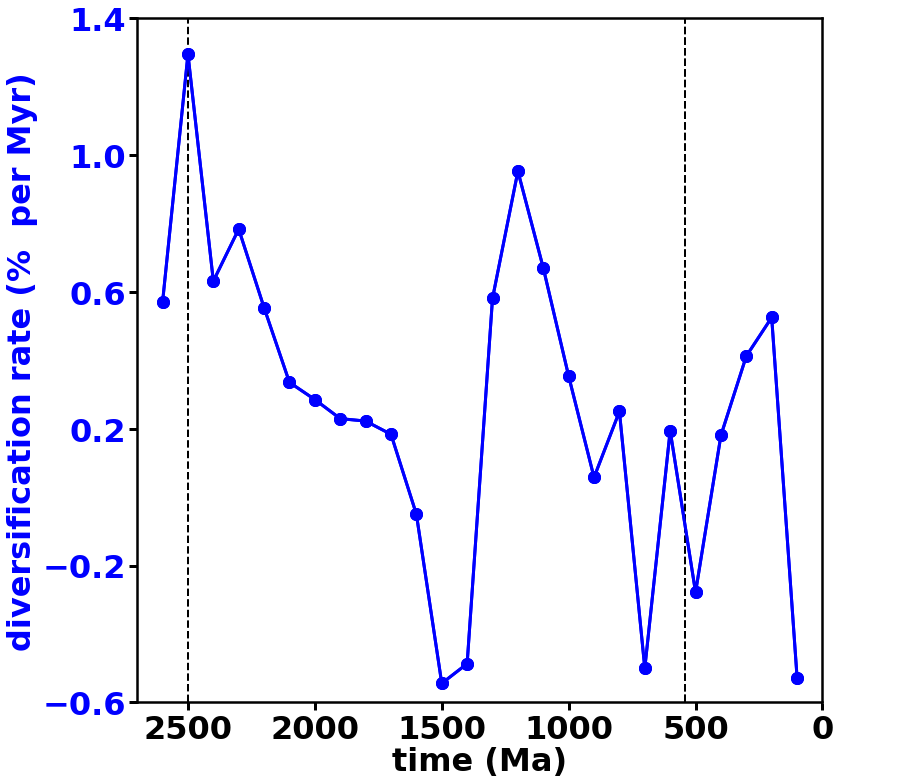

In [107]:
fig, ax1 = plt.subplots(1, 1, sharex=True, sharey=True, figsize=(15,13))
plt.plot(SAR202_middle_age_interval_list[0:26], SAR202Rate_Mean_list[0:26], 'o-', markersize=12, color='blue', linewidth=3)
plt.axvline(x=2500, linewidth=2, color='black', linestyle='--')
#ax1.text(2750, 1.45, r"Arch.", color='black', alpha=1, fontweight='bold', fontsize=30, rotation=0)
plt.axvline(x=541, linewidth=2, color='black', linestyle='--')
#plt.text(1700, 1.45, r' Prot.', color='black', alpha=1, fontweight='bold', fontsize=30, rotation=0)
plt.axvline(x=541, linewidth=2, color='black', linestyle='--')
#plt.text(450, 1.45, r'Phan.', color='black', alpha=1, fontweight='bold', fontsize=30, rotation=0)
ax1.tick_params(axis='both', which='major', labelsize=32, width=3, length=8)
plt.xlabel('time (Ma)',  size = '32', weight='bold')
ax1.xaxis.labelpad = 1
plt.ylabel('diversification rate (%  per Myr)',  size = '32', weight='bold',color='blue')
plt.xticks(np.arange(0, 2700, step=500), weight='bold')
plt.yticks(np.arange(-0.6, 1.5, step=0.4), weight='bold', color='blue')
plt.setp(ax.spines.values(), linewidth=2.5)
plt.xlim(0, 2700)
plt.ylim(-0.6, 1.4)

ax2 = ax1.twinx()  # instantiate a second axes that shares the same x-axis
ax2.plot(SAR202_middle_age_interval_list[0:26], SAR202Rate_Mean_list[0:26], 'o-', markersize=12, color='blue', linewidth=3)
ax2.set_ylabel("", size = '32', weight='bold', color="white")
ax2.tick_params(axis='y', which='major', labelsize=32, width=3, color="white")
plt.xticks(np.arange(0, 2700, step=500), weight='bold')
plt.yticks(np.arange(-0.6, 1.5, step=0.4), color="white")
plt.xlim(0, 2700)
plt.ylim(-0.6, 1.4)


ax = fig.gca()
ax.figure.set_size_inches(12.8, 11)
plt.gca().invert_xaxis()
plt.setp(ax.spines.values(), linewidth=2.5)
fig.tight_layout()  # otherwise the right y-label is slightly clipped
plt.savefig('diversification.jpg', dpi=500)
plt.show()

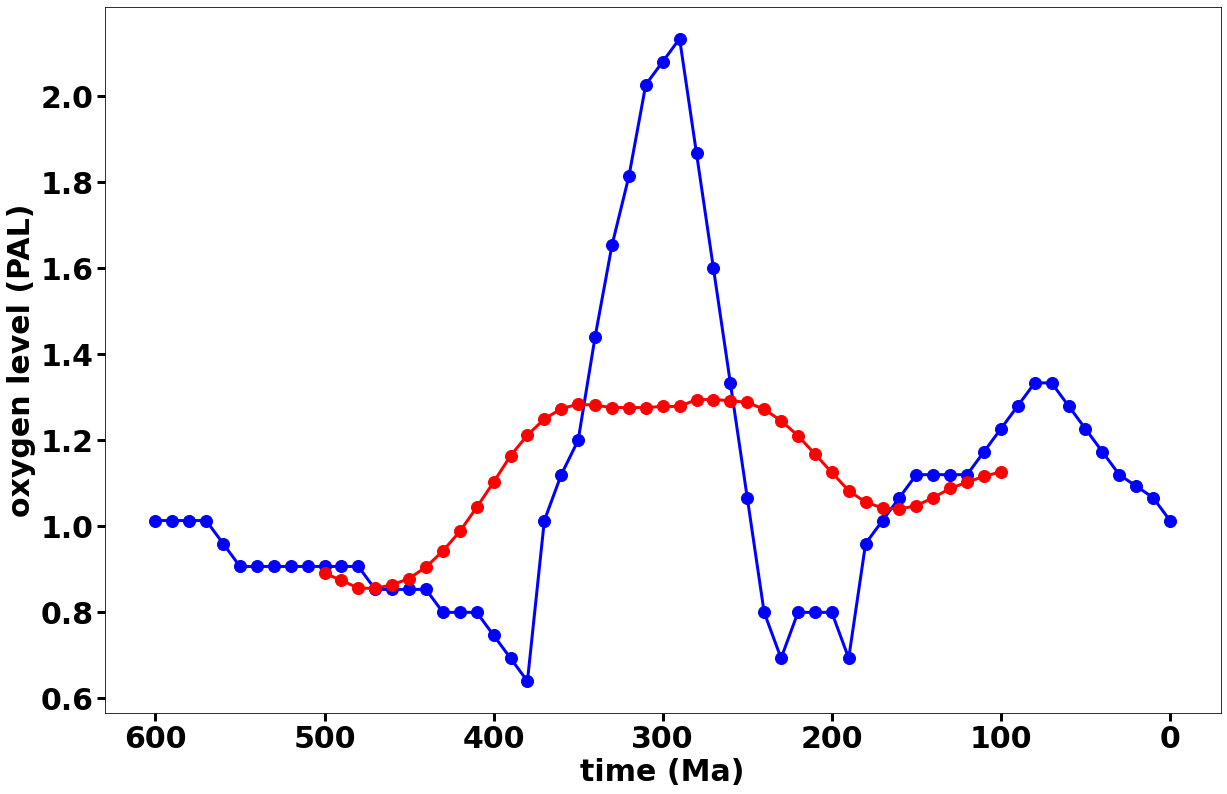

In [108]:
fig, ax1 = plt.subplots(1, 1, sharex=True, sharey=True, figsize=(20,13))
ax = fig.gca()

plt.plot(Berner_oxygen_time, Berner_oxygen_level_extrapolated/37.5, 'o-', 
         markersize=12, color='blue', linewidth=3)
ax1.tick_params(axis='both', which='major', labelsize=30, width=3, length=8)
plt.xlabel('time (Ma)',  size = '30', weight='bold')
plt.ylabel('oxygen level (PAL)',  size = '30', weight='bold')
plt.xticks(np.arange(0, 700, step=100), weight='bold')
plt.yticks(np.arange(0, 2.2, step=0.2), weight='bold')

plt.plot(x_ma_vec, y_ma_vec/37.5, 'o-', markersize=12, color='red', linewidth=3)
plt.gca().invert_xaxis()
plt.show()

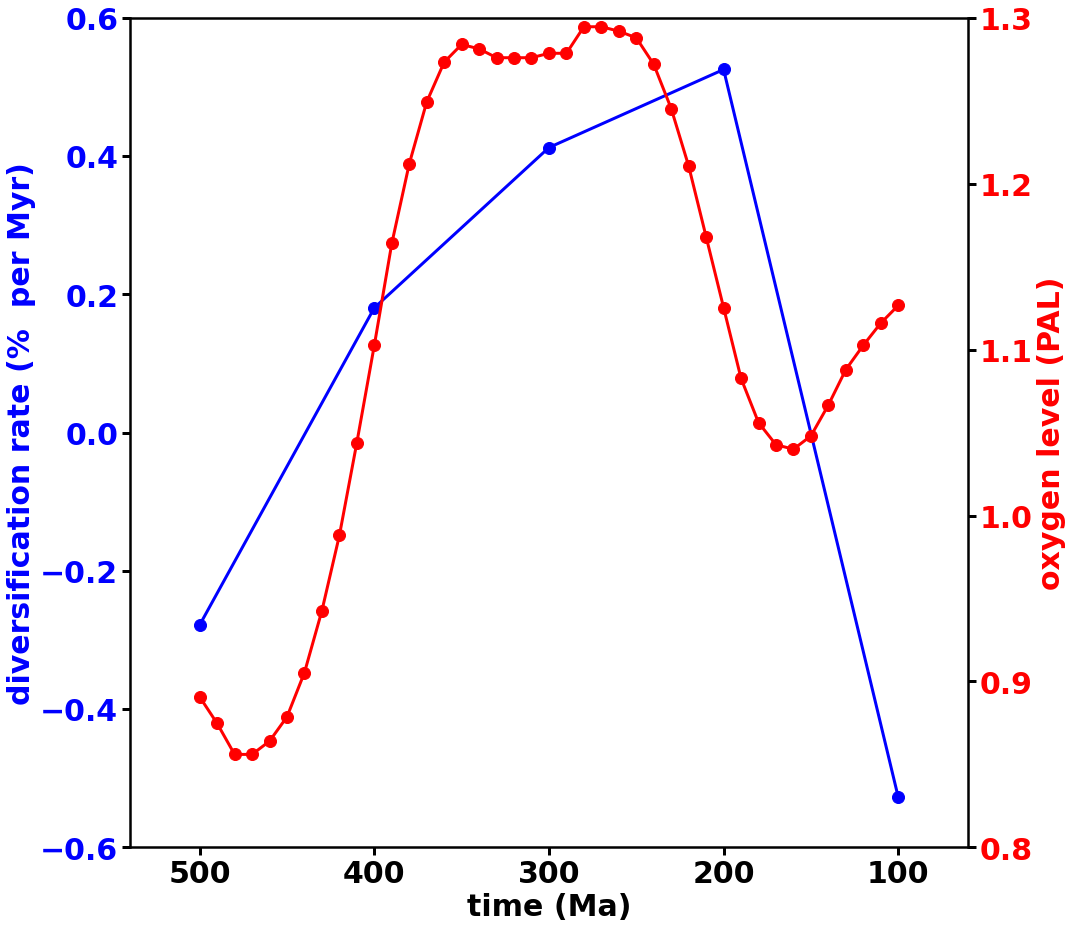

In [109]:
fig, ax1 = plt.subplots(1, 1, sharex=True, sharey=True, figsize=(15,13))
ax = fig.gca()

plt.plot(SAR202_middle_age_interval_list[21:27], SAR202Rate_Mean_list[21:27], 'o-', 
         markersize=12, color='blue', linewidth=3)
ax1.tick_params(axis='both', which='major', labelsize=30, width=3, length=8)
plt.xlabel('time (Ma)',  size = '30', weight='bold')
plt.ylabel('diversification rate (%  per Myr)',  size = '30', weight='bold', color="blue")
plt.xticks(np.arange(-200, 600, step=100), weight='bold')
plt.yticks(np.arange(-0.6, 0.7, step=0.2), weight='bold', color="blue")
plt.setp(ax.spines.values(), linewidth=2.5)

ax2 = ax1.twinx()  # instantiate a second axes that shares the same x-axis
ax2.plot(x_ma_vec, y_ma_vec/37.5, 'o-', markersize=12, color='red', linewidth=3)
ax2.set_ylabel("oxygen level (PAL)", size = '30', weight='bold', color="red")
ax2.tick_params(axis='y', which='major', labelsize=30, width=3, length=8)
plt.yticks(np.arange(0.8, 1.4, step=0.1), weight='bold', color="red")
plt.xticks(np.arange(0, 600, step=100), weight='bold')
plt.xlim(60,540)
plt.ylim(0.8, 1.3)

plt.gca().invert_xaxis()
fig.tight_layout()  # otherwise the right y-label is slightly clipped
plt.show()

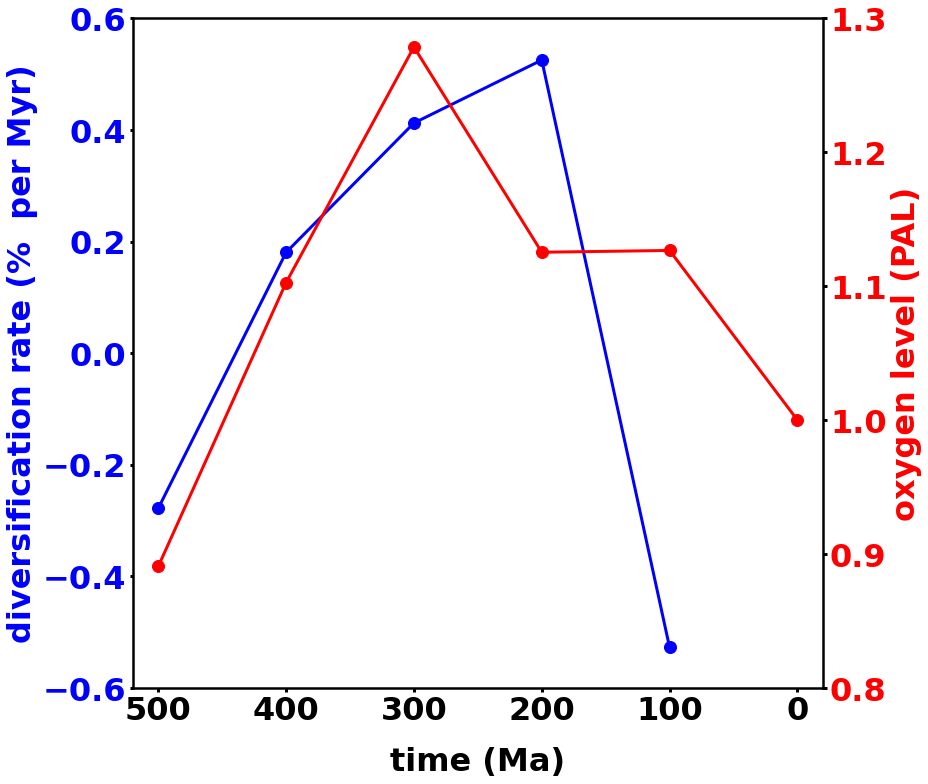

In [110]:
fig, ax1 = plt.subplots(1, 1, figsize=(15,13))
ax = fig.gca()

plt.plot(SAR202_middle_age_interval_list[21:27], SAR202Rate_Mean_list[21:27], 'o-', 
         markersize=12, color='blue', linewidth=3)
ax1.tick_params(axis='both', which='major', labelsize=32, width=3)
plt.xlabel('time (Ma)',  size = '32', weight='bold')
plt.ylabel('diversification rate (%  per Myr)',  size = '32', weight='bold', color="blue")
ax1.xaxis.labelpad = 20
plt.xticks(np.arange(-200, 600, step=100), weight='bold')
plt.yticks(np.arange(-0.6, 0.7, step=0.2), weight='bold', color="blue")
plt.setp(ax.spines.values(), linewidth=2.5)

ax2 = ax1.twinx()  # instantiate a second axes that shares the same x-axis
ax2.plot(np.array([500, 400, 300, 200, 100, 0]), np.array([0.89066667, 1.10266667, 1.27866667, 1.12533333, 1.12666667, 1]), 
         'o-', markersize=12, color='red', linewidth=3)
ax2.set_ylabel("oxygen level (PAL)", size = '32', weight='bold', color="red")
ax2.tick_params(axis='y', which='major', labelsize=32, width=3)
plt.yticks(np.arange(0.8, 1.6, step=0.1), weight='bold', color="red")
plt.xticks(np.arange(0, 600, step=100), weight='bold')
plt.xlim(-20,520)
plt.ylim(0.8,1.3)

plt.gca().invert_xaxis()
ax2.figure.set_size_inches(13, 11)
fig.tight_layout()  # otherwise the right y-label is slightly clipped
plt.savefig('Berner oxygen.jpg', dpi=500)
plt.show()

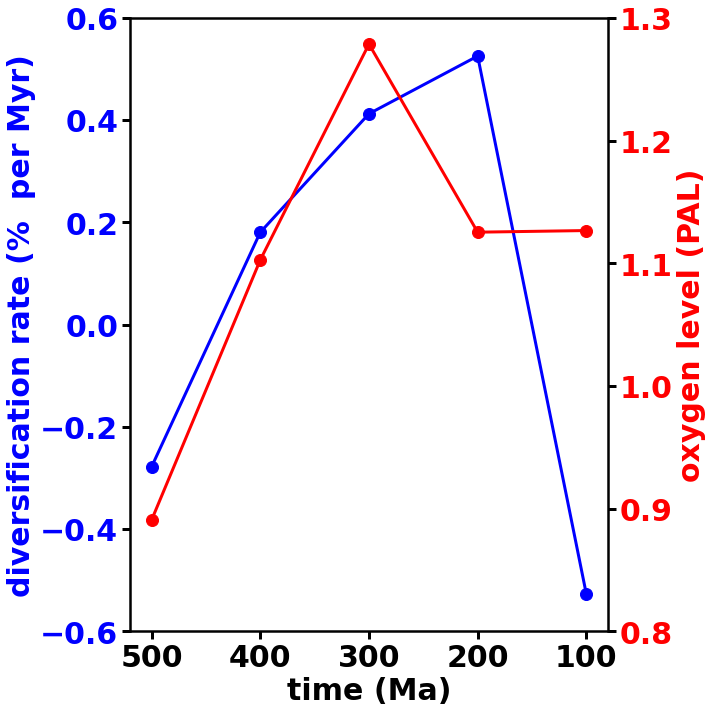

In [111]:
fig, ax1 = plt.subplots(1, 1, sharex=True, sharey=True, figsize=(15,13))
ax = fig.gca()


plt.plot(SAR202_middle_age_interval_list[21:27], SAR202Rate_Mean_list[21:27], 'o-', 
         markersize=12, color='blue', linewidth=3)
ax1.tick_params(axis='both', which='major', labelsize=30, width=3, length=8)
plt.xlabel('time (Ma)',  size = '30', weight='bold')
plt.ylabel('diversification rate (%  per Myr)',  size = '30', weight='bold', color="blue")
plt.xticks(np.arange(-200, 600, step=100), weight='bold')
plt.yticks(np.arange(-0.6, 0.7, step=0.2), weight='bold', color="blue")
plt.setp(ax.spines.values(), linewidth=2.5)

ax2 = ax1.twinx()  # instantiate a second axes that shares the same x-axis
ax2.plot(x_ma_vec_selected, y_ma_vec_selected/37.5, 'o-', markersize=12, color='red', linewidth=3)
ax2.set_ylabel("oxygen level (PAL)", size = '30', weight='bold', color="red")
ax2.tick_params(axis='y', which='major', labelsize=30, width=3, length=8)
plt.yticks(np.arange(0.8, 1.6, step=0.1), weight='bold', color="red")
plt.xticks(np.arange(0, 600, step=100), weight='bold')
plt.xlim(80,520)
plt.ylim(0.8,1.3)

plt.gca().invert_xaxis()
ax.figure.set_size_inches(10, 10)
fig.tight_layout()  # otherwise the right y-label is slightly clipped
plt.show()

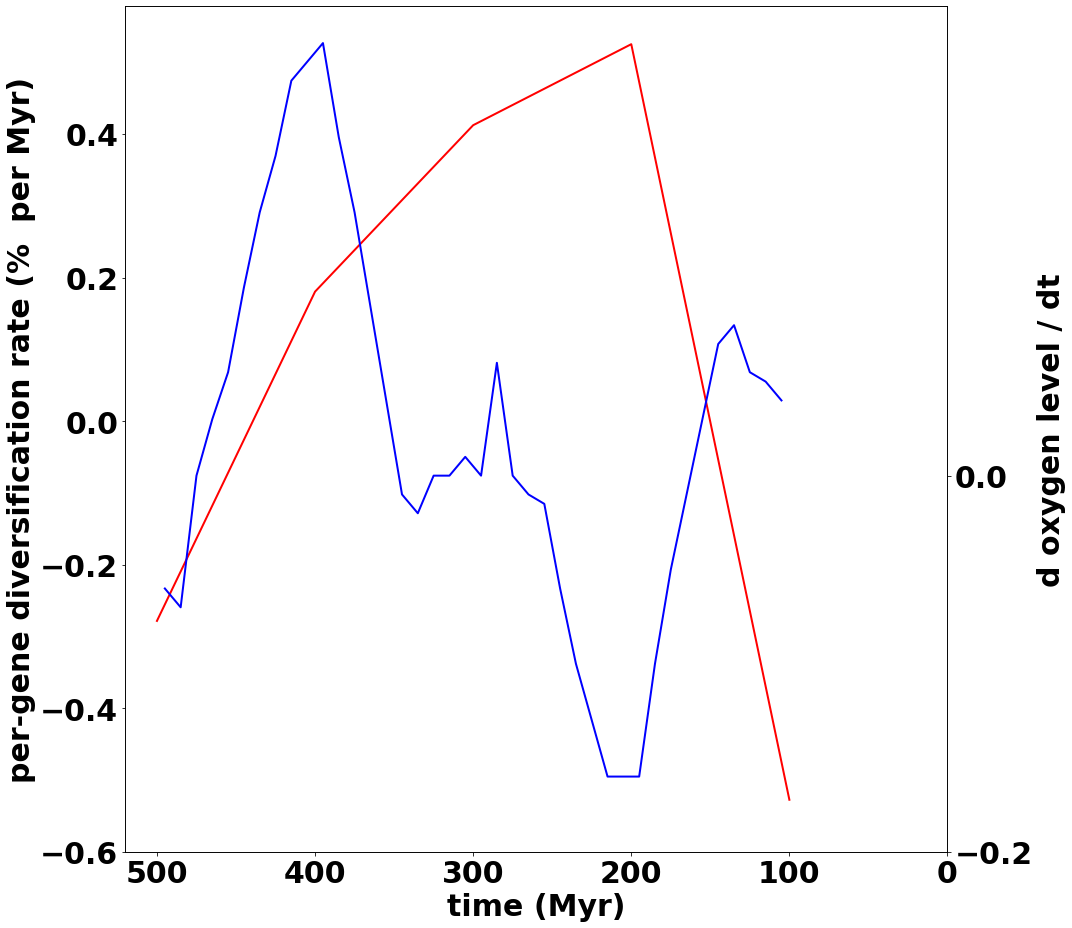

In [112]:
Berner_oxygen_level_ma_vec = y_ma_vec[0:-1] -  y_ma_vec[1:]
growth_rate_oxygen_level = Berner_oxygen_level_ma_vec / 10
Berner_oxygen_time_middle_point = x_ma_vec[1:] + (x_ma_vec[0:-1] - x_ma_vec[1:])/2

fig, ax1 = plt.subplots(1, 1, sharex=True, sharey=True, figsize=(15,13))
color = 'tab:red'
plt.plot(SAR202_middle_age_interval_list[21:27], SAR202Rate_Mean_list[21:27], '-', color='red', linewidth=2)
ax1.tick_params(axis='both', which='major', labelsize=30)
plt.xlabel('time (Myr)',  size = '30', weight='bold')
plt.ylabel('per-gene diversification rate (%  per Myr)',  size = '30', weight='bold')
plt.xticks(np.arange(-200, 600, step=100), weight='bold')
plt.yticks(np.arange(-0.6, 0.6, step=0.2), weight='bold')
plt.setp(ax.spines.values(), linewidth=2.5)

ax2 = ax1.twinx()  # instantiate a second axes that shares the same x-axis
color = 'tab:blue'
ax2.plot(Berner_oxygen_time_middle_point, - growth_rate_oxygen_level, '-', color='blue', linewidth=2)
ax2.set_ylabel("d oxygen level / dt", size = '30', weight='bold')
ax2.tick_params(axis='y', which='major', labelsize=30)
plt.yticks(np.arange(-0.2, 0.2, step=0.2), weight='bold')
plt.xticks(np.arange(0, 600, step=100), weight='bold')

plt.gca().invert_xaxis()
fig.tight_layout()  # otherwise the right y-label is slightly clipped
plt.show()

In [113]:
 SAR202Rate_Mean_list[0:26]

[0.5705448584676134,
 1.2953225829141637,
 0.6317782341836535,
 0.7838437420307568,
 0.553818670251097,
 0.33552256893350574,
 0.2853039500468135,
 0.22955154760953977,
 0.22243357613351747,
 0.18374100344818078,
 -0.04992556026074891,
 -0.5446928989330733,
 -0.48711579168693575,
 0.5811007968809951,
 0.9530483156093394,
 0.6703325027937739,
 0.35390187175649634,
 0.057698224919183534,
 0.25053260727808313,
 -0.5004063961899252,
 0.19422529770561292,
 -0.2782785671512329,
 0.18054061242296005,
 0.4124519326697622,
 0.525352589635713,
 -0.527478993272144]

In [114]:
np.array([32.25, 31.6 , 31.8 , 32.3 , 32.9 , 33.8 , 35.1 , 36.8 , 38.9 ,
       41.1 , 43.4 , 45.3 , 46.7 , 47.6 , 48.  , 48.  , 47.7 , 47.7 ,
       47.8 , 47.95, 47.85, 48.4 , 48.3 , 48.1 , 47.8 , 47.2 , 46.2 ,
       44.8 , 43.1 , 41.4 , 39.7 , 38.6 , 38.  , 37.8 , 38.  , 38.6 ,
       39.45, 39.95, 40.35])

array([32.25, 31.6 , 31.8 , 32.3 , 32.9 , 33.8 , 35.1 , 36.8 , 38.9 ,
       41.1 , 43.4 , 45.3 , 46.7 , 47.6 , 48.  , 48.  , 47.7 , 47.7 ,
       47.8 , 47.95, 47.85, 48.4 , 48.3 , 48.1 , 47.8 , 47.2 , 46.2 ,
       44.8 , 43.1 , 41.4 , 39.7 , 38.6 , 38.  , 37.8 , 38.  , 38.6 ,
       39.45, 39.95, 40.35])

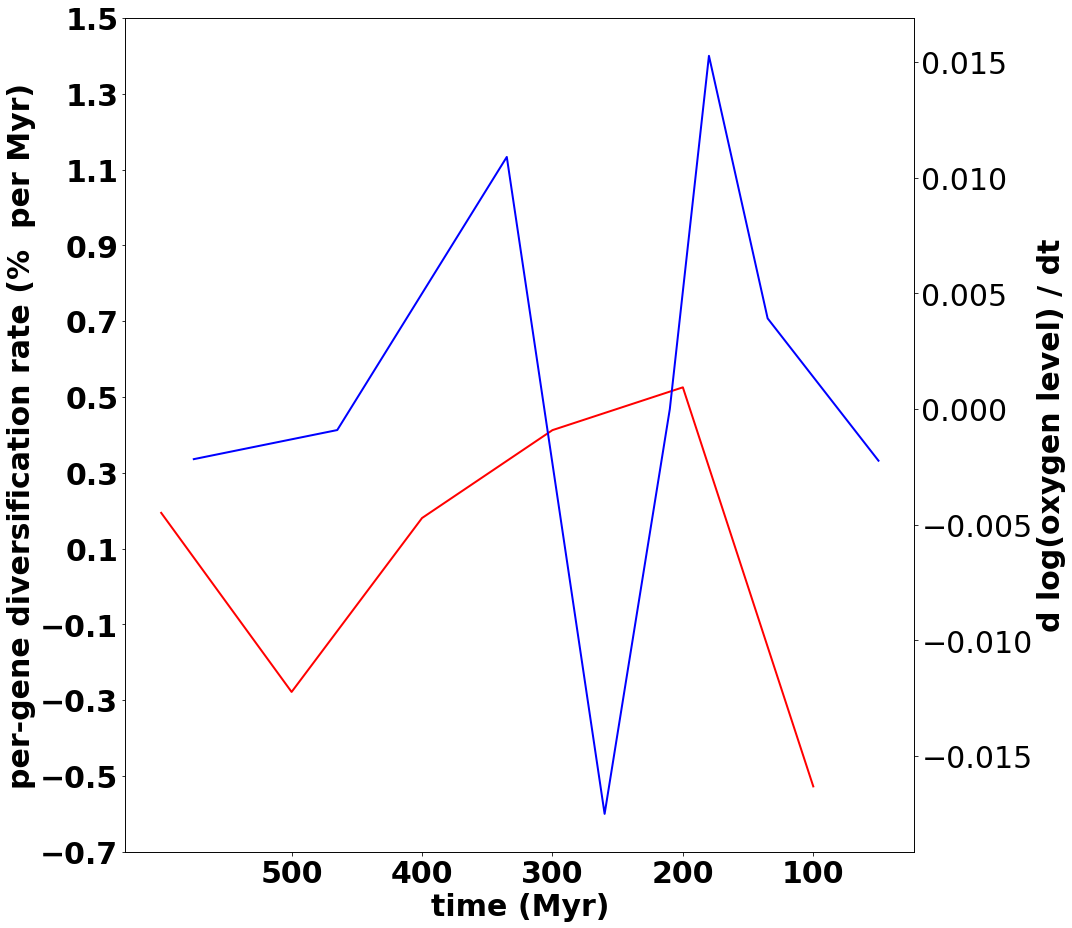

In [115]:
Berner_oxygen_level = np.log(np.array([35, 30, 80, 28, 28, 38, 50, 40])) - np.log(np.array([39, 35, 30, 80, 28, 28, 38, 50]))
Berner_oxygen_time_step_length = np.array([600, 550, 380, 290, 230, 190,170, 100]) - np.array([550, 380, 290, 230, 190,170, 100, 0])
per_captial_growth_oxygen_level = Berner_oxygen_level / Berner_oxygen_time_step_length
Berner_oxygen_time_middle_point = np.array([550, 380, 290, 230, 190,170, 100, 0]) + (np.array([600, 550, 380, 290, 230, 190,170, 100]) - np.array([550, 380, 290, 230, 190,170, 100, 0])) / 2

fig, ax1 = plt.subplots(1, 1, sharex=True, sharey=True, figsize=(15,13))
color = 'tab:red'
plt.plot(SAR202_middle_age_interval_list[20:27], SAR202Rate_Mean_list[20:27], '-', color='red', linewidth=2)
ax1.tick_params(axis='both', which='major', labelsize=30)
plt.xlabel('time (Myr)',  size = '30', weight='bold')
plt.ylabel('per-gene diversification rate (%  per Myr)',  size = '30', weight='bold')
plt.xticks(np.arange(-100, 600, step=100), weight='bold')
plt.yticks(np.arange(-0.7, 1.6, step=0.2), weight='bold')
plt.setp(ax.spines.values(), linewidth=2.5)

ax2 = ax1.twinx()  # instantiate a second axes that shares the same x-axis
color = 'tab:blue'
ax2.plot(Berner_oxygen_time_middle_point, per_captial_growth_oxygen_level, '-', color='blue', linewidth=2)
ax2.set_ylabel("d log(oxygen level) / dt", size = '30', weight='bold')
ax2.tick_params(axis='y', which='major', labelsize=30)

plt.gca().invert_xaxis()
fig.tight_layout()  # otherwise the right y-label is slightly clipped
plt.show()

In [116]:
y_ma_vec_selsted = np.array([32.25, 31.6 , 31.8 , 32.3 , 32.9 , 33.8 , 35.1 , 36.8 , 38.9 ,
       41.1 , 43.4 , 45.3 , 46.7 , 47.6 , 48.  , 48.  , 47.7 , 47.7 ,
       47.8 , 47.95, 47.85, 48.4 , 48.3 , 48.1 , 47.8 , 47.2 , 46.2 ,
       39.45, 39.95, 40.35])

In [117]:
# plt.figure(figsize=(30,30))

SAR202_middle_age_interval_list = np.linspace(-2600, -100, 26)

HighConfidence_middle_age_interval_list = np.linspace(-2900, -100, 29)
SAR_x = np.linspace(min(SAR202_middle_age_interval_list[0:len(SAR202_middle_age_interval_list)-1]), 0 , 5000)
NonHighConfidenceHGT_x = np.linspace(min(NonBoth_middle_age_interval_list[0:len(NonBoth_middle_age_interval_list)-1]), 0 , 5000)

fig, axes = plt.subplots(2, 1, sharex=True, sharey=True, figsize=(13,10))
plt.tick_params(labelcolor='none', top=False, bottom=True, left=False, right=False)

plt.subplot(3,1,1)
plt.plot(SAR202_middle_age_interval_list[1:26], SAR202Rate_Mean_list[1:26], '-', color='red')
plt.plot(SAR202_middle_age_interval_list[1:26], SAR202Rate_Mean_list[1:26],  'o', color='red', label="real data"
SAR202_lower_bound = (np.asarray(SAR202Rate_Mean_list) - np.asarray(SAR202Rate_Confidence_LowerBound_list)).tolist()
SAR202_upper_bound = (np.asarray(SAR202Rate_Confidence_UpperBound_list) - np.asarray(SAR202Rate_Mean_list)).tolist()
#plt.errorbar(SAR202_middle_age_interval_list[1:25], SAR202Rate_Mean_list[1:25], yerr=[SAR202_lower_bound[1:25], SAR202_upper_bound[1:25]], linestyle='',label="0.025 - 0.975 significance level for real data")
plt.plot(SimulatedSAR202_middle_age_interval_list[1:26], SimulatedSAR202Rate_Mean_list[1:26], '-', color='blue')
plt.plot(SimulatedSAR202_middle_age_interval_list[1:26], SimulatedSAR202Rate_Mean_list[1:26],  'o', color='blue', label="mean of of null hypothesis")
#plt.fill_between(SimulatedSAR202_middle_age_interval_list[1:25], np.asarray(SimulatedSAR202Rate_Confidence_LowerBound_list)[1:25], 
#                 np.asarray(SimulatedSAR202Rate_Confidence_UpperBound_list)[1:25], color='green', alpha=.3, label="0.025 - 0.975 significance level for simulated data")
plt.plot(SimulatedSAR202_middle_age_interval_list[1:26], SimulatedSAR202_data_upper[1:26], '-', color='m')
plt.plot(SimulatedSAR202_middle_age_interval_list[1:26], SimulatedSAR202_data_upper[1:26], 'o', color='m')
plt.plot(SimulatedSAR202_middle_age_interval_list[1:26], SimulatedSAR202_data_lower[1:26], '-', color='m')
plt.plot(SimulatedSAR202_middle_age_interval_list[1:26], SimulatedSAR202_data_lower[1:26], 'o', color='m', label="standard deviation of null hypothesis")

plt.xlim(-3050, 50)
plt.ylim(-1.5, 1.5)
plt.tick_params(axis='both', which='major', labelsize=15)
plt.title('SAR202 Nodes',  size = '20')
#plt.axhline(y=0., color='grey', linestyle='--', alpha = 1)
#plt.axhline(y=null_hypothesis_SAR202_growth_rate*100, color='grey', linestyle='-', alpha = 1, label="null hypothesis")
plt.legend()

plt.subplot(3,1,2)
plt.plot(HighConfidence_middle_age_interval_list[0:29], HighConfidenceRate_Mean_list[0:29], '-', color='red')
plt.plot(HighConfidence_middle_age_interval_list[0:29], HighConfidenceRate_Mean_list[0:29],  'o', color='red', label="mean")
HighConfidence_lower_bound = (np.asarray(HighConfidenceRate_Mean_list) - np.asarray(HighConfidenceRate_Confidence_LowerBound_list)).tolist()
HighConfidence_upper_bound = (np.asarray(HighConfidenceRate_Confidence_UpperBound_list) - np.asarray(HighConfidenceRate_Mean_list)).tolist()
#plt.errorbar(HighConfidence_middle_age_interval_list[0:28], HighConfidenceRate_Mean_list[0:28], yerr=[HighConfidence_lower_bound[0:28], HighConfidence_upper_bound[0:28]], linestyle='',label="0.025 - 0.975 significance level for real data")
#plt.fill_between(HighConfidence_middle_age_interval_list, HighConfidenceRate_Confidence_LowerBound_list, HighConfidenceRate_Confidence_UpperBound_list, color='deepskyblue', alpha=0.5, label="5th-95th percentile")
plt.plot(SimulatedHGT_middle_age_interval_list[1:30], SimulatedHGTRate_Mean_list[1:30], '-', color='blue')
plt.plot(SimulatedHGT_middle_age_interval_list[1:30], SimulatedHGTRate_Mean_list[1:30],  'o', color='blue', label="null hypothesis")
#plt.fill_between(SimulatedHGT_middle_age_interval_list[1:29], np.asarray(SimulatedHGTRate_Confidence_LowerBound_list)[1:29], 
#                 np.asarray(SimulatedHGTRate_Confidence_UpperBound_list)[1:29], color='green', alpha=.3, label="0.025 - 0.975 significance level for simulated data")

plt.plot(SimulatedHGT_middle_age_interval_list[1:30], SimulatedHGT_data_upper[1:30], '-', color='m')
plt.plot(SimulatedHGT_middle_age_interval_list[1:30], SimulatedHGT_data_upper[1:30], 'o', color='m')
plt.plot(SimulatedHGT_middle_age_interval_list[1:30], SimulatedHGT_data_lower[1:30], '-', color='m')
plt.plot(SimulatedHGT_middle_age_interval_list[1:30], SimulatedHGT_data_lower[1:30], 'o', color='m', label="standard deviation of null hypothesis")

plt.xlim(-3050, 50)
plt.ylim(-1.5, 1.5)
plt.tick_params(axis='both', which='major', labelsize=15)
plt.title('$80\%$ Confidence HGT Nodes',  size = '20')
#plt.axhline(y=0., color='grey', linestyle='--', alpha = 1)
#plt.axhline(y=null_hypothesis_HighConfidence_HGT_growth_rate*100, color='grey', linestyle='-', alpha = 1, label="null hypothesis")
plt.legend()

plt.subplot(3,1,3)
plt.plot(NonBoth_middle_age_interval_list[0:29], NonBothRate_Mean_list[0:29], '-', color='red')
plt.plot(NonBoth_middle_age_interval_list[0:29], NonBothRate_Mean_list[0:29], 'o', color='red', label="real data")
NonBoth_lower_bound = (np.asarray(NonBothRate_Mean_list) - np.asarray(NonBothRate_Confidence_LowerBound_list)).tolist()
NonBoth_upper_bound = (np.asarray(NonBothRate_Confidence_UpperBound_list) - np.asarray(NonBothRate_Mean_list)).tolist()
#plt.errorbar(HighConfidence_middle_age_interval_list[0:28], NonBothRate_Mean_list[0:28], yerr=[NonBoth_lower_bound[0:28], NonBoth_upper_bound[0:28]], linestyle='',label="0.025 - 0.975 significance level real data")
#plt.fill_between(NonBoth_middle_age_interval_list, NonBothRate_Confidence_LowerBound_list, NonBothRate_Confidence_UpperBound_list, color='deepskyblue', alpha=0.5, label="5th-95th percentile")
plt.plot(SimulatedControl_middle_age_interval_list[1:30], SimulatedControlRate_Mean_list[1:30], '-', color='blue')
plt.plot(SimulatedControl_middle_age_interval_list[1:30], SimulatedControlRate_Mean_list[1:30],  'o', color='blue', label="null hypothesis")
#plt.fill_between(SimulatedControl_middle_age_interval_list[1:29], np.asarray(SimulatedControlRate_Confidence_LowerBound_list)[1:29], 
#                 np.asarray(SimulatedControlRate_Confidence_UpperBound_list)[1:29], color='green', alpha=.3, label="0.025 - 0.975 significance level for simulated data")

plt.plot(SimulatedControl_middle_age_interval_list[1:30], SimulatedControl_data_upper[1:30], '-', color='m')
plt.plot(SimulatedControl_middle_age_interval_list[1:30], SimulatedControl_data_upper[1:30], 'o', color='m')
plt.plot(SimulatedControl_middle_age_interval_list[1:30], SimulatedControl_data_lower[1:30], '-', color='m')
plt.plot(SimulatedControl_middle_age_interval_list[1:30], SimulatedControl_data_lower[1:30], 'o', color='m', label="simulated standard deviation")

plt.xlim(-3050, 50)
plt.ylim(-1.5, 1.5)
plt.tick_params(axis='both', which='major', labelsize=15)
plt.title('Background',  size = '20')
#plt.axhline(y=0., color='grey', linestyle='--', alpha = 1)
#plt.axhline(y=null_hypothesis_NonHighConfidenceHGT_and_NonSAR202_growth_rate*100, color='green', linestyle='-', alpha = 1, label="null hypothesis")
plt.legend()

#plt.subplot(4,1,4)
#plt.plot(HighConfidence_middle_age_interval_list[0:28], AllRate_Mean_list[0:28], '-', color='red')
#plt.plot(HighConfidence_middle_age_interval_list[0:28], AllRate_Mean_list[0:28],  'o', color='red', label="mean")
#AllNotes_lower_bound = (np.asarray(AllRate_Mean_list) - np.asarray(AllRate_Confidence_LowerBound_list)).tolist()
#AllNotes_upper_bound = (np.asarray(AllRate_Confidence_UpperBound_list) - np.asarray(AllRate_Mean_list)).tolist()
#plt.errorbar(HighConfidence_middle_age_interval_list[0:28], AllRate_Mean_list[0:28], yerr=[AllNotes_lower_bound[0:28], AllNotes_upper_bound[0:28]], linestyle='',label="5th-95th percentile")
#plt.fill_between(HighConfidence_middle_age_interval_list, AllRate_Confidence_LowerBound_list, AllRate_Confidence_UpperBound_list, color='deepskyblue', alpha=0.5, label="5th-95th percentile")
#plt.xlim(-3050, 50)
#plt.ylim(-0.7, 1.7)
#plt.tick_params(axis='both', which='major', labelsize=15)
#plt.title('All Nodes on the Gene Tree',  size = '20')
#plt.axhline(y=0., color='grey', linestyle='--', alpha = 1)
#plt.axhline(y=null_hypothesis_AllNodes_growth_rate*100, color='green', linestyle='-', alpha = 1, label="null hypothesis")
#plt.legend()

fig.text(0.5, 0.1, 'time (Myr)', va='center', ha='center' ,  size = '25')
fig.text(0.02, 0.5, 'per gene growth rate (%  per Myr)', va='center', ha='center', rotation='vertical', size = '25')

plt.show()

SyntaxError: invalid syntax (<ipython-input-117-ec42b655eae0>, line 15)

In [ ]:
plt.figure(figsize=(15,10))

SAR202_middle_age_interval_list = np.linspace(-2600, -100, 26)

HighConfidence_middle_age_interval_list = np.linspace(-2900, -100, 29)
SAR_x = np.linspace(min(SAR202_middle_age_interval_list[0:len(SAR202_middle_age_interval_list)-1]), 0 , 5000)
NonHighConfidenceHGT_x = np.linspace(min(NonBoth_middle_age_interval_list[0:len(NonBoth_middle_age_interval_list)-1]), 0 , 5000)

fig, axes = plt.subplots(3, 1, sharex=True, sharey=True, figsize=(15,10))
plt.tick_params(labelcolor='none', top=False, bottom=True, left=False, right=False)

plt.subplot(1,1,1)
plt.plot(SAR202_middle_age_interval_list[1:26], more_number_SAR202Rate_Mean_list[0:25], '-', color='red')
plt.plot(SAR202_middle_age_interval_list[1:26], more_number_SAR202Rate_Mean_list[0:25],  'o', color='red', label="real data (N=4000)")

#plt.plot(SAR202_middle_age_interval_list[1:26], less_samples_SAR202Rate_Mean_list[0:25], '-', color='green')
#plt.plot(SAR202_middle_age_interval_list[1:26], less_samples_SAR202Rate_Mean_list[0:25],  'o', color='green', label="real data (N=100)")

SAR202_lower_bound = (np.asarray(SAR202Rate_Mean_list) - np.asarray(SAR202Rate_Confidence_LowerBound_list))
SAR202_upper_bound = (np.asarray(SAR202Rate_Confidence_UpperBound_list) - np.asarray(SAR202Rate_Mean_list))
#plt.errorbar(SAR202_middle_age_interval_list[1:25], SAR202Rate_Mean_list[1:25], yerr=[SAR202_lower_bound[1:25], SAR202_upper_bound[1:25]], linestyle='',label="0.025 - 0.975 significance level for real data")
plt.plot(SimulatedSAR202_middle_age_interval_list[1:26], SimulatedSAR202Rate_Mean_list[1:26], '-', color='blue', label="mean of of null hypothesis")
#plt.plot(SimulatedSAR202_middle_age_interval_list[1:26], SimulatedSAR202Rate_Mean_list[1:26],  'o', color='blue')
#plt.fill_between(SimulatedSAR202_middle_age_interval_list[1:25], np.asarray(SimulatedSAR202Rate_Confidence_LowerBound_list)[1:25], 
#                 np.asarray(SimulatedSAR202Rate_Confidence_UpperBound_list)[1:25], color='green', alpha=.3, label="0.025 - 0.975 significance level for simulated data")

a1 = SimulatedSAR202Rate_Mean_list + 61.64*(SimulatedSAR202_data_upper - SimulatedSAR202Rate_Mean_list)
a2 = SimulatedSAR202Rate_Mean_list - 61.64*(SimulatedSAR202Rate_Mean_list - SimulatedSAR202_data_lower)


#plt.plot(SimulatedSAR202_middle_age_interval_list[1:26], SimulatedSAR202_data_upper[1:26], '-', color='orange', label="standard deviation of null hypothesis (N=4000)")
#plt.plot(SimulatedSAR202_middle_age_interval_list[1:26], SimulatedSAR202_data_lower[1:26], '-', color='orange')

plt.plot(SimulatedSAR202_middle_age_interval_list[1:26], a1[1:26], '-', color='m', label="standard deviation of null hypothesis -- N=1")
plt.plot(SimulatedSAR202_middle_age_interval_list[1:26], a1[1:26], 'o', color='m')
plt.plot(SimulatedSAR202_middle_age_interval_list[1:26], a2[1:26], '-', color='m')
plt.plot(SimulatedSAR202_middle_age_interval_list[1:26], a2[1:26], 'o', color='m')

plt.xlim(-3050, 50)
plt.ylim(-4, 4)
plt.tick_params(axis='both', which='major', labelsize=15)
plt.title('SAR202 Nodes',  size = '20')
#plt.axhline(y=0., color='grey', linestyle='--', alpha = 1)
#plt.axhline(y=null_hypothesis_SAR202_growth_rate*100, color='grey', linestyle='-', alpha = 1, label="null hypothesis")
plt.legend()

fig.text(0.5, 0.05, 'time (Myr)', va='center', ha='center' ,  size = '25')
fig.text(0.06, 0.5, 'per-gene diversification rate (%  per Myr)', va='center', ha='center', rotation='vertical', size = '25')

#plt.savefig('Bootstrapping Four Comparison_of_Divergence_Rate_1 (non-cumulative) Version 2.jpg')
plt.show()

In [ ]:
SAR202_realdata_and_STD_ratio = (np.array(SAR202Rate_Mean_list[1:26])- np.array(SimulatedSAR202Rate_Mean_list[1:26])) / (np.array(SimulatedSAR202_data_upper[1:26]) - np.array(SimulatedSAR202Rate_Mean_list[1:26]))
SAR202_abs_realdata_and_STD_ratio = np.abs(SAR202_realdata_and_STD_ratio)

In [ ]:
HighConfidenceRate_realdata_and_STD_ratio = (np.array(HighConfidenceRate_Mean_list[0:29]) - np.array(SimulatedHGTRate_Mean_list[0:29])) / (np.array(SimulatedHGT_data_upper[1:30]) - np.array(SimulatedHGTRate_Mean_list[0:29]))
HighConfidenceRate_abs__realdata_and_STD_ratio = np.abs(HighConfidenceRate_realdata_and_STD_ratio)

In [ ]:
NonBothRate_realdata_and_STD_ratio = (np.array(NonBothRate_Mean_list[0:29]) - np.array(SimulatedControlRate_Mean_list[0:29])) / (np.array(SimulatedControl_data_upper[1:30]) - np.array(SimulatedControlRate_Mean_list[0:29]))
NonBothRate_abs_realdata_and_STD_ratio = np.abs(NonBothRate_realdata_and_STD_ratio )

In [ ]:
plt.figure(figsize=(15,30))

HighConfidence_middle_age_interval_list = np.linspace(-2900, -100, 29)
HighConfidenceHGT_array_middle_age_interval = np.linspace(min(HighConfidence_middle_age_interval_list[0:len(HighConfidence_middle_age_interval_list)-1]), 0 , 5000)
SAR_x = np.linspace(min(SAR202_middle_age_interval_list[0:len(SAR202_middle_age_interval_list)-1]), 0 , 5000)
NonHighConfidenceHGT_x = np.linspace(min(NonBoth_middle_age_interval_list[0:len(NonBoth_middle_age_interval_list)-1]), 0 , 5000)

fig, axes = plt.subplots(3, 1, sharex=True, sharey=True, figsize=(13,25))
plt.tick_params(labelcolor='none', top=False, bottom=True, left=False, right=False)

plt.subplot(4,1,1)
#plt.plot(SAR202_middle_age_interval_list[0:25], SAR202Rate_Median_list[0:25], '-', color='green')
#plt.plot(SAR202_middle_age_interval_list[0:25], SAR202Rate_Median_list[0:25],  'o', color='green', label="median")
plt.plot(SAR202_middle_age_interval_list[0:25], SAR202Rate_Mean_list[0:25], '-', color='red')
plt.plot(SAR202_middle_age_interval_list[0:25], SAR202Rate_Mean_list[0:25],  'o', color='red', label="mean")
#SAR202_lower_bound = (np.asarray(SAR202Rate_Mean_list) - np.asarray(SAR202Rate_Confidence_LowerBound_list)).tolist()
#SAR202_upper_bound = (np.asarray(SAR202Rate_Confidence_UpperBound_list) - np.asarray(SAR202Rate_Mean_list)).tolist()
plt.errorbar(SAR202_middle_age_interval_list, SAR202Rate_Mean_list, yerr=[SAR202_lower_bound, SAR202_upper_bound], linestyle='',label="5th-95th percentile")
plt.fill_between(SAR202_middle_age_interval_list[0:25], SAR202Rate_Confidence_LowerBound_list[0:25], SAR202Rate_Confidence_UpperBound_list[0:25], color='deepskyblue', alpha=0.5, label="5th-95th percentile")
plt.legend()
plt.xlim(-3050, 50)
plt.ylim(-0.7, 1.7)
plt.tick_params(axis='both', which='major', labelsize=15)
plt.title('SAR202 Nodes',  size = '20')
plt.axhline(y=0., color='grey', linestyle='--', alpha = 1)

plt.subplot(4,1,2)
#plt.plot(HighConfidence_middle_age_interval_list[0:28], HighConfidenceRate_Median_list[0:28], '-', color='green')
#plt.plot(HighConfidence_middle_age_interval_list[0:28], HighConfidenceRate_Median_list[0:28],  'o', color='green', label="median")
plt.plot(HighConfidence_middle_age_interval_list[0:28], HighConfidenceRate_Mean_list[0:28], '-', color='red')
plt.plot(HighConfidence_middle_age_interval_list[0:28], HighConfidenceRate_Mean_list[0:28],  'o', color='red', label="mean")
#HighConfidence_lower_bound = (np.asarray(HighConfidenceRate_Mean_list) - np.asarray(HighConfidenceRate_Confidence_LowerBound_list)).tolist()
#HighConfidence_upper_bound = (np.asarray(HighConfidenceRate_Confidence_UpperBound_list) - np.asarray(HighConfidenceRate_Mean_list)).tolist()
#plt.errorbar(HighConfidence_middle_age_interval_list, HighConfidenceRate_Mean_list, yerr=[HighConfidence_lower_bound, HighConfidence_upper_bound], linestyle='',label="5th-95th percentile")
plt.fill_between(HighConfidence_middle_age_interval_list[0:28], HighConfidenceRate_Confidence_LowerBound_list[0:28], HighConfidenceRate_Confidence_UpperBound_list[0:28], color='deepskyblue', alpha=0.5, label="5th-95th percentile")
plt.legend()
plt.xlim(-3050, 50)
plt.ylim(-0.7, 1.7)
plt.tick_params(axis='both', which='major', labelsize=15)
plt.title('$80\%$ Confidence HGT Nodes',  size = '20')
plt.axhline(y=0., color='grey', linestyle='--', alpha = 1)

plt.subplot(4,1,3)
#plt.plot(NonBoth_middle_age_interval_list[0:28], NonBothRate_Median_list[0:28], '-', color='green')
#plt.plot(NonBoth_middle_age_interval_list[0:28], NonBothRate_Median_list[0:28],  'o', color='green', label="median")
plt.plot(NonBoth_middle_age_interval_list[0:28], NonBothRate_Mean_list[0:28], '-', color='red')
plt.plot(NonBoth_middle_age_interval_list[0:28], NonBothRate_Mean_list[0:28], 'o', color='red', label="mean")
#NonBoth_lower_bound = (np.asarray(NonBothRate_Mean_list) - np.asarray(NonBothRate_Confidence_LowerBound_list)).tolist()
#NonBoth_upper_bound = (np.asarray(NonBothRate_Confidence_UpperBound_list) - np.asarray(NonBothRate_Mean_list)).tolist()
#plt.errorbar(HighConfidence_middle_age_interval_list, NonBothRate_Mean_list, yerr=[NonBoth_lower_bound, NonBoth_upper_bound], linestyle='',label="5th-95th percentile")
plt.fill_between(NonBoth_middle_age_interval_list[0:28], NonBothRate_Confidence_LowerBound_list[0:28], NonBothRate_Confidence_UpperBound_list[0:28], color='deepskyblue', alpha=0.5, label="5th-95th percentile")
plt.legend()
plt.xlim(-3050, 50)
plt.ylim(-0.7, 1.7)
plt.tick_params(axis='both', which='major', labelsize=15)
plt.title('Background',  size = '20')
plt.axhline(y=0., color='grey', linestyle='--', alpha = 1)

plt.subplot(4,1,4)
#plt.plot(HighConfidence_middle_age_interval_list[0:28], AllRate_Median_list[0:28], '-', color='green')
#plt.plot(HighConfidence_middle_age_interval_list[0:28], AllRate_Median_list[0:28],  'o', color='green', label="median")
plt.plot(HighConfidence_middle_age_interval_list[0:28], AllRate_Mean_list[0:28], '-', color='red')
plt.plot(HighConfidence_middle_age_interval_list[0:28], AllRate_Mean_list[0:28],  'o', color='red', label="mean")
#AllNotes_lower_bound = (np.asarray(AllRate_Mean_list) - np.asarray(AllRate_Confidence_LowerBound_list)).tolist()
#AllNotes_upper_bound = (np.asarray(AllRate_Confidence_UpperBound_list) - np.asarray(AllRate_Mean_list)).tolist()
#plt.errorbar(HighConfidence_middle_age_interval_list, AllRate_Mean_list, yerr=[AllNotes_lower_bound, AllNotes_upper_bound], linestyle='',label="5th-95th percentile")
plt.fill_between(HighConfidence_middle_age_interval_list[0:28], AllRate_Confidence_LowerBound_list[0:28], AllRate_Confidence_UpperBound_list[0:28], color='deepskyblue', alpha=0.5, label="5th-95th percentile")
plt.legend()
plt.xlim(-3050, 50)
plt.ylim(-0.7, 1.7)
plt.tick_params(axis='both', which='major', labelsize=15)
plt.title('All Nodes on the Gene Tree',  size = '20')
plt.axhline(y=0., color='grey', linestyle='--', alpha = 1)

fig.text(0.5, 0.1, 'time (Myr)', va='center', ha='center' ,  size = '25')
fig.text(0.02, 0.5, 'per gene growth rate of mean frequency of evolutionary events (%  per Myr)', va='center', ha='center', rotation='vertical', size = '25')

#plt.savefig('Bootstrapping Four Comparison_of_Divergence_Rate_2 (non-cumulative) Version 2.jpg')
plt.show()

In [ ]:
SAR202_all_average_node_density_DataFrame = pd.DataFrame(np.array(SAR2020_all_average_node_density_list))
SAR202_cumulative_node_density_DataFrame = np.log(np.cumsum(SAR202_all_average_node_density_DataFrame, axis=1))

SAR202_cumulative_node_density_nonNANandINF_index = np.isinf(SAR202_cumulative_node_density_DataFrame).any(1).tolist()

SAR202_cumulative_node_density_nonNANandINF_index = np.isinf(SAR202_cumulative_node_density_DataFrame).any(1).tolist()
SAR202_cumulative_node_density_nonNANandINF_index_list = []
for i in range (0, len(SAR202_cumulative_node_density_nonNANandINF_index)):
    if SAR202_cumulative_node_density_nonNANandINF_index[i] == False:
        SAR202_cumulative_node_density_nonNANandINF_index_list.append(i)
        
SAR202_cumulative_node_density_nonNANandINF_DataFrame = SAR202_cumulative_node_density_DataFrame.loc[SAR202_cumulative_node_density_nonNANandINF_index_list]

SAR202_cumulative_node_middle_age_interval_list = np.linspace(-2600, -100, 26)

SAR202cumulativeRate_list = []
SAR202cumulative_Mean_list = []
SAR202cumulative_STD_list = []
SAR202cumulative_Median_list = []
SAR202cumulative_Confidence_UpperBound_list = []
SAR202cumulative_Confidence_LowerBound_list = []
for i in range(0,26):
    SAR202cumulativeRate = (SAR202_cumulative_node_density_nonNANandINF_DataFrame[i+1] - SAR202_cumulative_node_density_nonNANandINF_DataFrame[i]) / bin_size *100
    SAR202cumulativeRate_list.append(SAR202cumulativeRate)
    SAR202cumulative_Mean_list.append(SAR202cumulativeRate.mean())
    SAR202cumulative_STD_list.append(SAR202cumulativeRate.std())
    SAR202cumulative_Median_list.append(SAR202cumulativeRate.median())
    SAR202cumulative_Confidence_UpperBound_list.append(SAR202cumulativeRate.quantile(0.9))
    SAR202cumulative_Confidence_LowerBound_list.append(SAR202cumulativeRate.quantile(0.1))
    
plt.subplots(1, 1, figsize=(10, 10))
plt.plot(SAR202_cumulative_node_middle_age_interval_list, SAR202cumulative_Median_list, '-', color='green')
plt.plot(SAR202_cumulative_node_middle_age_interval_list, SAR202cumulative_Median_list,  'o', color='green', label="median")
plt.plot(SAR202_cumulative_node_middle_age_interval_list, SAR202cumulative_Mean_list, '-', color='red')
plt.plot(SAR202_cumulative_node_middle_age_interval_list, SAR202cumulative_Mean_list,  'o', color='red', label="mean")
plt.fill_between(SAR202_cumulative_node_middle_age_interval_list, SAR202cumulative_Confidence_LowerBound_list, SAR202cumulative_Confidence_UpperBound_list, color='deepskyblue', alpha=0.5, label="5th-95th percentile")
plt.legend()
plt.xlim(-3050, 50)
plt.xlabel('time (Myr)',  size = '20')
plt.ylabel('per capita growth rate of node density (%  per Myr)', size = '20')
plt.tick_params(axis='both', which='major', labelsize=15)
plt.title('SAR202 Nodes',  size = '20')
#plt.savefig('Boostrap SAR202 divergence rate growth.jpg')
plt.show()   

In [ ]:
HighConfidence_HGT_all_average_node_density_DataFrame = pd.DataFrame(np.array(HGT_all_average_node_density_list))
HighConfidence_HGT_cumulative_node_density_DataFrame = np.log(np.cumsum(HighConfidence_HGT_all_average_node_density_DataFrame, axis=1))

HighConfidence_HGT_cumulative_node_density_nonNANandINF_index = np.isinf(HighConfidence_HGT_cumulative_node_density_DataFrame).any(1).tolist()

HighConfidence_HGT_cumulative_node_density_nonNANandINF_index = np.isinf(HighConfidence_HGT_cumulative_node_density_DataFrame).any(1).tolist()
HighConfidence_HGT_cumulative_node_density_nonNANandINF_index_list = []
for i in range (0, len(HighConfidence_HGT_cumulative_node_density_nonNANandINF_index)):
    if HighConfidence_HGT_cumulative_node_density_nonNANandINF_index[i] == False:
        HighConfidence_HGT_cumulative_node_density_nonNANandINF_index_list.append(i)
        
HighConfidence_HGT_cumulative_node_density_nonNANandINF_DataFrame = HighConfidence_HGT_cumulative_node_density_DataFrame.loc[HighConfidence_HGT_cumulative_node_density_nonNANandINF_index_list]

HighConfidence_HGT_cumulative_node_middle_age_interval_list = np.linspace(-2900, -100, 29)

HighConfidence_HGTcumulativeRate_list = []
HighConfidence_HGTcumulative_Mean_list = []
HighConfidence_HGTcumulative_STD_list = []
HighConfidence_HGTcumulative_Median_list = []
HighConfidence_HGTcumulative_Confidence_UpperBound_list = []
HighConfidence_HGTcumulative_Confidence_LowerBound_list = []
for i in range(0,29):
    HighConfidence_HGTcumulativeRate = (HighConfidence_HGT_cumulative_node_density_nonNANandINF_DataFrame[i+1] - HighConfidence_HGT_cumulative_node_density_nonNANandINF_DataFrame[i]) / bin_size *100
    HighConfidence_HGTcumulativeRate_list.append(HighConfidence_HGTcumulativeRate)
    HighConfidence_HGTcumulative_Mean_list.append(HighConfidence_HGTcumulativeRate.mean())
    HighConfidence_HGTcumulative_STD_list.append(HighConfidence_HGTcumulativeRate.std())
    HighConfidence_HGTcumulative_Median_list.append(HighConfidence_HGTcumulativeRate.median())
    HighConfidence_HGTcumulative_Confidence_UpperBound_list.append(HighConfidence_HGTcumulativeRate.quantile(0.9))
    HighConfidence_HGTcumulative_Confidence_LowerBound_list.append(HighConfidence_HGTcumulativeRate.quantile(0.1))
    
plt.subplots(1, 1, figsize=(10, 10))
plt.plot(HighConfidence_HGT_cumulative_node_middle_age_interval_list, HighConfidence_HGTcumulative_Median_list, '-', color='green')
plt.plot(HighConfidence_HGT_cumulative_node_middle_age_interval_list, HighConfidence_HGTcumulative_Median_list,  'o', color='green', label="median")
plt.plot(HighConfidence_HGT_cumulative_node_middle_age_interval_list, HighConfidence_HGTcumulative_Mean_list, '-', color='red')
plt.plot(HighConfidence_HGT_cumulative_node_middle_age_interval_list, HighConfidence_HGTcumulative_Mean_list,  'o', color='red', label="mean")
plt.fill_between(HighConfidence_HGT_cumulative_node_middle_age_interval_list, HighConfidence_HGTcumulative_Confidence_LowerBound_list, HighConfidence_HGTcumulative_Confidence_UpperBound_list, color='deepskyblue', alpha=0.5, label="5th-95th percentile")
plt.legend()
plt.xlim(-3050, 50)
plt.xlabel('time (Myr)',  size = '20')
plt.ylabel('per capita growth rate of node density (%  per Myr)', size = '20')
plt.tick_params(axis='both', which='major', labelsize=15)
plt.title('$80\%$ Confidence HGT Nodes',  size = '20')
#plt.savefig('Boostrap SAR202 divergence rate growth.jpg')
plt.show()   

In [ ]:
nonBoth_all_average_node_density_DataFrame = pd.DataFrame(np.array(nonBoth_all_average_node_density_list))
nonBoth_cumulative_node_density_DataFrame = np.log(np.cumsum(nonBoth_all_average_node_density_DataFrame, axis=1))

nonBoth_cumulative_node_density_nonNANandINF_index = np.isinf(nonBoth_cumulative_node_density_DataFrame).any(1).tolist()

nonBoth_cumulative_node_density_nonNANandINF_index = np.isinf(nonBoth_cumulative_node_density_DataFrame).any(1).tolist()
nonBoth_cumulative_node_density_nonNANandINF_index_list = []
for i in range (0, len(nonBoth_cumulative_node_density_nonNANandINF_index)):
    if nonBoth_cumulative_node_density_nonNANandINF_index[i] == False:
        nonBoth_cumulative_node_density_nonNANandINF_index_list.append(i)
        
nonBoth_cumulative_node_density_nonNANandINF_DataFrame = nonBoth_cumulative_node_density_DataFrame.loc[nonBoth_cumulative_node_density_nonNANandINF_index_list]

nonBoth_cumulative_node_middle_age_interval_list = np.linspace(-2900, -100, 29)

nonBothcumulativeRate_list = []
nonBothcumulative_Mean_list = []
nonBothcumulative_STD_list = []
nonBothcumulative_Median_list = []
nonBothcumulative_Confidence_UpperBound_list = []
nonBothcumulative_Confidence_LowerBound_list = []
for i in range(0,29):
    nonBothcumulativeRate = (nonBoth_cumulative_node_density_nonNANandINF_DataFrame[i+1] - nonBoth_cumulative_node_density_nonNANandINF_DataFrame[i]) / bin_size *100
    nonBothcumulativeRate_list.append(nonBothcumulativeRate)
    nonBothcumulative_Mean_list.append(nonBothcumulativeRate.mean())
    nonBothcumulative_STD_list.append(nonBothcumulativeRate.std())
    nonBothcumulative_Median_list.append(nonBothcumulativeRate.median())
    nonBothcumulative_Confidence_UpperBound_list.append(nonBothcumulativeRate.quantile(0.9))
    nonBothcumulative_Confidence_LowerBound_list.append(nonBothcumulativeRate.quantile(0.1))
    
plt.subplots(1, 1, figsize=(10, 10))
plt.plot(nonBoth_cumulative_node_middle_age_interval_list, nonBothcumulative_Median_list, '-', color='green')
plt.plot(nonBoth_cumulative_node_middle_age_interval_list, nonBothcumulative_Median_list,  'o', color='green', label="median")
plt.plot(nonBoth_cumulative_node_middle_age_interval_list, nonBothcumulative_Mean_list, '-', color='red')
plt.plot(nonBoth_cumulative_node_middle_age_interval_list, nonBothcumulative_Mean_list,  'o', color='red', label="mean")
plt.fill_between(nonBoth_cumulative_node_middle_age_interval_list, nonBothcumulative_Confidence_LowerBound_list, nonBothcumulative_Confidence_UpperBound_list, color='deepskyblue', alpha=0.5, label="5th-95th percentile")
plt.legend()
plt.xlim(-3050, 50)
plt.xlabel('time (Myr)',  size = '20')
plt.ylabel('per capita growth rate of node density (%  per Myr)', size = '20')
plt.tick_params(axis='both', which='major', labelsize=15)
plt.title('Background',  size = '20')
#plt.savefig('Boostrap SAR202 divergence rate growth.jpg')
plt.show() 

In [ ]:
AllNodes_all_average_node_density_DataFrame = pd.DataFrame(np.array(AllNodes_all_average_node_density_list))
AllNodes_cumulative_node_density_DataFrame = np.log(np.cumsum(AllNodes_all_average_node_density_DataFrame, axis=1))

AllNodes_cumulative_node_density_nonNANandINF_index = np.isinf(AllNodes_cumulative_node_density_DataFrame).any(1).tolist()

AllNodes_cumulative_node_density_nonNANandINF_index = np.isinf(nonBoth_cumulative_node_density_DataFrame).any(1).tolist()
AllNodes_cumulative_node_density_nonNANandINF_index_list = []
for i in range (0, len(AllNodes_cumulative_node_density_nonNANandINF_index)):
    if AllNodes_cumulative_node_density_nonNANandINF_index[i] == False:
        AllNodes_cumulative_node_density_nonNANandINF_index_list.append(i)
        
AllNodes_cumulative_node_density_nonNANandINF_DataFrame = AllNodes_cumulative_node_density_DataFrame.loc[AllNodes_cumulative_node_density_nonNANandINF_index_list]

AllNodes_cumulative_node_middle_age_interval_list = np.linspace(-2900, -100, 29)

AllNodescumulativeRate_list = []
AllNodescumulative_Mean_list = []
AllNodescumulative_STD_list = []
AllNodescumulative_Median_list = []
AllNodescumulative_Confidence_UpperBound_list = []
AllNodescumulative_Confidence_LowerBound_list = []
for i in range(0,29):
    AllNodescumulativeRate = (AllNodes_cumulative_node_density_nonNANandINF_DataFrame [i+1] - AllNodes_cumulative_node_density_nonNANandINF_DataFrame[i]) / bin_size *100
    AllNodescumulativeRate_list.append(AllNodescumulativeRate)
    AllNodescumulative_Mean_list.append(AllNodescumulativeRate.mean())
    AllNodescumulative_STD_list.append(AllNodescumulativeRate.std())
    AllNodescumulative_Median_list.append(AllNodescumulativeRate.median())
    AllNodescumulative_Confidence_UpperBound_list.append(AllNodescumulativeRate.quantile(0.9))
    AllNodescumulative_Confidence_LowerBound_list.append(AllNodescumulativeRate.quantile(0.1))
    
plt.subplots(1, 1, figsize=(10, 10))
plt.plot(AllNodes_cumulative_node_middle_age_interval_list, AllNodescumulative_Median_list, '-', color='green')
plt.plot(AllNodes_cumulative_node_middle_age_interval_list, AllNodescumulative_Median_list,  'o', color='green', label="median")
plt.plot(AllNodes_cumulative_node_middle_age_interval_list, AllNodescumulative_Mean_list, '-', color='red')
plt.plot(AllNodes_cumulative_node_middle_age_interval_list, AllNodescumulative_Mean_list,  'o', color='red', label="mean")
plt.fill_between(AllNodes_cumulative_node_middle_age_interval_list, AllNodescumulative_Confidence_LowerBound_list, AllNodescumulative_Confidence_UpperBound_list, color='deepskyblue', alpha=0.5, label="5th-95th percentile")
plt.legend()
plt.xlim(-3050, 50)
plt.xlabel('time (Myr)',  size = '20')
plt.ylabel('per capita growth rate of node density (%  per Myr)', size = '20')
plt.tick_params(axis='both', which='major', labelsize=15)
plt.title('All Nodes on the Gene Tree',  size = '20')
#plt.savefig('Boostrap SAR202 divergence rate growth.jpg')
plt.show() 

In [ ]:
one_prior_nullsimulation_SAR202_rate = [1.5040773967762746, 0.5753641449035616,1.0116009116784799,
                                        0.5198754592859087,0.6795415285041662, 0.4588110888134577,
                                        0.25802586286889273, 0.48576505050980684, 0.3691482679101714,
                                        0.22228970182445185, -0.06105182011413835, 0.021557721074978886,
                                        0.17259829336597843, 0.5270443337099966, 0.6138644351700213,
                                        0.5222919683928926, 0.40205794978654996, 0.11498413932222018,
                                        -0.15036442949797824, 0.44802472252696024,0.08658597415812119]

In [ ]:
one_prior_nullsimulation_HGT_rate = [ 0.2956775462279788, 0.2652479995895076, 0.1879774343900733,
                                     0.06711113104604127, 0.15037654267205003, -0.012291638511556789, 
                                     0.14145048372347002, 0.15458879593503294, 0.2610493398861822, 
                                     0.15270371097401458, 0.19655513761512466, 0.09589400778626711,
                                     -0.01898584033491879, 0.04838092801872573, 0.042533375619481895,
                                     0.20204134728451084, 0.140533448135427, 0.12167908277589667, 
                                     0.1276816149271518, 0.09089919082864029, 0.22216746534115384, 
                                     0.23595179937926591, 0.23731189094735594, 0.23080990705954685, 
                                     0.393317242491996, 0.2933491909978745, 0.22817432229650914, 
                                     0.130922187496203, -0.6134537836541187]

In [ ]:
one_prior_nullsimulation_Control_rate = [0.3389393431357304, 0.3009408082427276, 0.2524957633267375,
                                         0.14890842549511163,0.20030070193281713, 0.13384358368798743,
                                         0.15238030706598327, 0.12560449792089656, 0.17094991851287933, 
                                         0.07907667958359887, 0.11011722579016149, 0.08514995599579311,
                                         0.09370272085025455, 0.08950183820857838, 0.07943148146686019, 
                                         0.07206784903877761, 0.06793036031916966, 0.06338619197580009,
                                         0.1354143194698092, 0.22097233458035784, 0.2716009699975914,
                                         0.24803528345055392, 0.2149475440776718, 0.18712616259897308,
                                         0.192970848506262, 0.31691548312027185, 0.46069135615994705,
                                         0.6204333028889698, 0.6613270404525352]

In [ ]:
NonBoth_middle_age_interval_list = np.linspace(-2900, -100, 29)
NoBootstrapping_SAR202_middle_age_interval_list = np.linspace(-2600, -100, 26)

In [ ]:
SAR202_SignificantLevel_Upper = np.asarray(SimulatedSAR202Rate_Confidence_UpperBound_list[1:27])
SAR202_SignificantLevel_Lower = np.asarray(SimulatedSAR202Rate_Confidence_LowerBound_list[1:27])

In [ ]:
Difference_SAR202_SignificantLevel_Upper = SAR202_SignificantLevel_Upper - null_hypothesis_SAR202_growth_rate*100
Difference_SAR202_SignificantLevel_Lower = null_hypothesis_SAR202_growth_rate*100 - SAR202_SignificantLevel_Lower

log_SAR202_SignificantLevel_Upper = np.log(np.asarray(Difference_SAR202_SignificantLevel_Upper[0:len(Difference_SAR202_SignificantLevel_Upper)]))
log_SAR202_SignificantLevel_Lower = np.log(np.asarray(Difference_SAR202_SignificantLevel_Lower[0:len(Difference_SAR202_SignificantLevel_Lower)]))

In [ ]:
plt.figure(figsize=(10,10))
plt.plot(SimulatedControl_middle_age_interval_list[5:30], SimulatedSAR202Rate_Confidence_UpperBound_list[1:26],color='r',alpha=.5, label = 0.975)
plt.plot(SimulatedControl_middle_age_interval_list[5:30], SimulatedSAR202Rate_Confidence_LowerBound_list[1:26], color='b',alpha=.5, label = 0.025)
plt.legend()
plt.xlim(-3050, 50)
plt.xlabel('time (Myr)',  size = '20')
plt.ylabel('significance levels 0.025 and 0.975', size = '20')
plt.tick_params(axis='both', which='major', labelsize=15)
plt.title('SAR202 Nodes',  size = '20')
plt.savefig('SAR202 Nodes significance level 0.025 - 0.975.jpg')
plt.show()

In [ ]:
plt.figure(figsize=(10,10))
plt.plot(SimulatedControl_middle_age_interval_list[5:30], log_SAR202_SignificantLevel_Upper, color='r',alpha=.5, label = 0.975)
plt.plot(SimulatedControl_middle_age_interval_list[5:30], log_SAR202_SignificantLevel_Lower, color='b',alpha=.5, label = 0.025)

plt.legend()
plt.xlim(-3050, 50)
plt.xlabel('time (Myr)',  size = '20')
plt.ylabel('Logarithm of the significance levels 0.025 and 0.975', size = '20')
plt.tick_params(axis='both', which='major', labelsize=15)
plt.title('SAR202 Nodes',  size = '20')
plt.savefig('logarithm for SAR202 Nodes significance level 0.025 - 0.975.jpg')
plt.show()

In [ ]:
upper_significance_level_ratio_list = []
lower_significance_level_ratio_list = []
for i in range (1, len(SimulatedSAR202Rate_Confidence_UpperBound_list)-1):
    upper_significance_level_ratio = SimulatedSAR202Rate_Confidence_UpperBound_list[i+1] / SimulatedSAR202Rate_Confidence_UpperBound_list[i]
    lower_significance_level_ratio = SimulatedSAR202Rate_Confidence_LowerBound_list[i+1] / SimulatedSAR202Rate_Confidence_LowerBound_list[i]
    upper_significance_level_ratio_list.append(upper_significance_level_ratio)
    lower_significance_level_ratio_list.append(lower_significance_level_ratio)
threetical_pediction = np.exp(-0.131679557/2)

plt.figure(figsize=(10,10))
plt.plot(SimulatedControl_middle_age_interval_list[6:30], upper_significance_level_ratio_list, color='r',alpha= 0.3)
#plt.plot(SimulatedControl_middle_age_interval_list[6:30], lower_significance_level_ratio_list, color='b',alpha= 0.3)
plt.axhline(y=threetical_pediction, color='green', linestyle='-', alpha = 1, label="theoretica ratio")

plt.legend()
plt.xlim(-3050, 50)
plt.xlabel('time (Myr)',  size = '20')
plt.ylabel('Ratio of two neighboring upper significance levels', size = '20')
plt.tick_params(axis='both', which='major', labelsize=15)
plt.title('SAR202 Nodes',  size = '20')
plt.savefig('SAR202_significance_level_ratio_list.jpg')
plt.show()

In [ ]:
SimulatedSAR202Rate_Confidence_UpperBound_list[3] / SimulatedSAR202Rate_Confidence_UpperBound_list[2]

In [ ]:
HighConfidence_SignificantLevel_Lower = np.asarray(SimulatedHGTRate_Confidence_LowerBound_list)
HighConfidence_SignificantLevel_Upper = np.asarray(SimulatedHGTRate_Confidence_UpperBound_list)

log_HighConfidence_SignificantLevel_Lower = np.log(np.asarray(HighConfidence_SignificantLevel_Lower[1:len(HighConfidence_SignificantLevel_Lower)]))
log_HighConfidence_SignificantLevel_Upper = np.log(np.asarray(HighConfidence_SignificantLevel_Upper[1:len(HighConfidence_SignificantLevel_Upper)]))

In [ ]:
plt.figure(figsize=(10,10))
plt.plot(SimulatedControl_middle_age_interval_list[1:30], SimulatedHGTRate_Confidence_LowerBound_list[1:30],color='r',alpha=.5, label = 0.975)
plt.plot(SimulatedControl_middle_age_interval_list[1:30], SimulatedHGTRate_Confidence_UpperBound_list[1:30],color='b',alpha=.5, label = 0.025)
plt.legend()
plt.xlim(-3050, 50)
plt.xlabel('time (Myr)',  size = '20')
plt.ylabel('significance levels 0.025 and 0.975', size = '20')
plt.tick_params(axis='both', which='major', labelsize=15)
plt.title('HGT Nodes',  size = '20')
plt.savefig('HGT Nodes significance level 0.025 - 0.975.jpg')
plt.show()

In [ ]:
plt.figure(figsize=(10,10))
plt.plot(SimulatedControl_middle_age_interval_list[1:30], log_HighConfidence_SignificantLevel_Upper, color='r',alpha=.5, label=0.975)
plt.plot(SimulatedControl_middle_age_interval_list[1:30], log_HighConfidence_SignificantLevel_Lower, color='b',alpha=.5, label=0.025)

plt.legend()
plt.xlim(-3050, 50)
plt.xlabel('time (Myr)',  size = '20')
plt.ylabel('Logarithm of the significance levels 0.025 and 0.975', size = '20')
plt.tick_params(axis='both', which='major', labelsize=15)
plt.title('HGT Nodes',  size = '20')
plt.savefig('logarithm for HGT Nodes significance level 0.025 - 0.975.jpg')
plt.show()

In [ ]:
growth_probability = 0.131679557 # This equals to the average per gene groth rate * time interval
non_growth_probability = 1 - growth_probability
gorth_time_invertal_length = 100000000 # Assmue that the length a interal is 1000000 years
interval_number = 2700 * 1000000 / gorth_time_invertal_length
bin_size = 100

In [ ]:
with open("10000Simulation_SAR202_100MyrBinSize_tree_nullhypothesis.txt") as f:
    datawewant = f.readlines()
input = datawewant[0]
output= ast.literal_eval(input)
Simulation_SAR202_list = output

len(Simulation_SAR202_list)

In [ ]:
bin_size = 100

In [ ]:
SAR202_nodes_density_each_interval_dataframe = pd.DataFrame(Simulation_SAR202_list)

In [ ]:
number_of_tree = len(SAR202_nodes_density_each_interval_dataframe)

In [ ]:
SAR202_nodes_number_normalized_by_tree_number = SAR202_nodes_density_each_interval_dataframe / number_of_tree
SAR202_nodes_density_normalized_by_tree_number = SAR202_nodes_number_normalized_by_tree_number / float(bin_size)
SAR202_log_nodes_density_normalized_by_tree_number = np.log(SAR202_nodes_density_normalized_by_tree_number)

In [ ]:
growth_probability

In [ ]:
SAR202_theoretical_mean_result_list = []
for i in range (2, 30):
    theoretical_mean_result = growth_probability / 100 - (1-np.exp(-growth_probability))*(1-growth_probability)/(2*3840*growth_probability) * np.exp(-growth_probability*(i-2))
    SAR202_theoretical_mean_result_list.append(theoretical_mean_result)
SAR202_theoretical_mean_result_list

In [ ]:
SAR202_theoretical_result_list = []
for i in range (2, 30):
    theoretical_result = np.sqrt((np.exp(-growth_probability)+1)*(1-growth_probability)/(3840*growth_probability) * np.exp(-growth_probability*(i-2)))
    SAR202_theoretical_result_list.append(theoretical_result)
SAR202_theoretical_result_list

In [ ]:
SAR202_theoretical_growth_probability = 0.131679557
SimulatedSAR202_prediction_upper = 0.125 + np.array(SAR202_theoretical_result_list[0:26])
SimulatedSAR202_prediction_lower = 0.125 - np.array(SAR202_theoretical_result_list[0:26])

In [ ]:
a=np.array(SAR202_theoretical_result_list[0:27]) 
SimulatedSAR202_data_upper =  0.125  + a[0:26]
SimulatedSAR202_data_lower =  0.125 - a[0:26]

In [ ]:
b = np.array(SimulatedSAR202Rate_STD_list)
SimulatedSAR202_prediction_upper =  0.125 + b
SimulatedSAR202_prediction_lower =  0.125 - b

In [ ]:
SimulatedSAR202RateList = []
SimulatedSAR202Rate_Mean_list = []
SimulatedSAR202Rate_STD_list = []
SimulatedSAR202Rate_Median_list = []
SimulatedSAR202Rate_Confidence_UpperBound_list = []
SimulatedSAR202Rate_Confidence_LowerBound_list = []

SimulatedSAR202_middle_age_interval_list = np.linspace(-2600, -100, 26)

for i in range(0,26):
    SimulatedSAR202Rate = (SAR202_log_nodes_density_normalized_by_tree_number[i+1] - SAR202_log_nodes_density_normalized_by_tree_number[i]) / bin_size *100
    SimulatedSAR202RateList.append(SimulatedSAR202Rate)
    SimulatedSAR202Rate_Mean_list.append(SimulatedSAR202Rate.mean())
    SimulatedSAR202Rate_STD_list.append(SimulatedSAR202Rate.std())
    SimulatedSAR202Rate_Median_list.append(SimulatedSAR202Rate.median())
    SimulatedSAR202Rate_Confidence_UpperBound_list.append(SimulatedSAR202Rate.quantile(0.975))
    SimulatedSAR202Rate_Confidence_LowerBound_list.append(SimulatedSAR202Rate.quantile(0.025))
    
SimulatedSAR202_lower_bound = (np.asarray(SimulatedSAR202Rate_Mean_list) - np.asarray(SimulatedSAR202Rate_Confidence_LowerBound_list)).tolist()
SimulatedSAR202_upper_bound = (np.asarray(SimulatedSAR202Rate_Confidence_UpperBound_list) - np.asarray(SimulatedSAR202Rate_Mean_list)).tolist()

plt.subplots(1, 1, figsize=(10, 10))

#plt.errorbar(SimulatedSAR202_middle_age_interval_list[1:26], SimulatedSAR202Rate_Mean_list[1:26], yerr=[SimulatedSAR202_lower_bound[1:26], SimulatedSAR202_upper_bound[1:26]], linestyle='',label="5th-95th percentile")
plt.plot(SimulatedSAR202_middle_age_interval_list[1:26], SimulatedSAR202Rate_Mean_list[1:26], '-', color='red')
plt.plot(SimulatedSAR202_middle_age_interval_list[1:26], SimulatedSAR202Rate_Mean_list[1:26],  'o', color='red', label="mean")
#plt.fill_between(SimulatedSAR202_middle_age_interval_list[1:26], np.asarray(SimulatedSAR202Rate_Confidence_LowerBound_list)[1:26], np.asarray(SimulatedSAR202Rate_Confidence_UpperBound_list)[1:26],color='m', label="0.025-0.975 significance level region", alpha=.5)
#plt.errorbar(SimulatedSAR202_middle_age_interval_list[1:26], SimulatedSAR202Rate_Mean_list[1:26], yerr=[SimulatedSAR202_lower_bound[1:26], SimulatedSAR202_upper_bound[1:26]], linestyle='',label="5th-95th percentile")
plt.axhline(y=growth_probability, color='grey', linestyle='-', alpha = 1, label="null hypothesis")
plt.plot(SimulatedSAR202_middle_age_interval_list[1:26], SimulatedSAR202_data_upper[1:26], '-', color='m')
plt.plot(SimulatedSAR202_middle_age_interval_list[1:26], SimulatedSAR202_data_lower[1:26],  '-', color='m', label="simulation")

plt.plot(SimulatedSAR202_middle_age_interval_list[1:26], SimulatedSAR202_prediction_upper[1:26], '-', color='blue')
plt.plot(SimulatedSAR202_middle_age_interval_list[1:26], SimulatedSAR202_prediction_lower[1:26],  '-', color='blue', label="theory")

plt.legend()
plt.xlim(-3050, 50)
plt.xlabel('time (Myr)',  size = '20')
plt.ylabel('per capita growth rate of node density (%  per Myr)', size = '20')
plt.tick_params(axis='both', which='major', labelsize=15)
plt.title('Simulated SAR202 Nodes Growth Rates',  size = '20')
plt.show()